

<font color=Indigo size='5'>Model Approach</font> <br> <br> 
    The analysis is divided into 9 main parts:

1. Data Sourcing, Data Understanding
2. Data cleaning, Manipulation, Visulaization and Detecting Outliers
3. Perform EDA on Prepared Dataset (Univariate and Bivariate Analysis)
4. Model Preparation
5. Training and Testing set Data Split
6. Model Building
7. Making Predictions, Feature selections,
8. Model Evaluation with differnet algorithm like LR, Random Forest, Stacking, Adaboost,selectKbest,.
9. Final Inference

<font size='4'> Import Libraries and set required parameters </font>

In [1]:
#To filter warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To display all the columns
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 210)

#set it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

#set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:,.2f}'.format 

# Machine Learning related libraries
import sklearn
from scipy import stats
from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA



# Data Sourcing and Understanding the dataset

In [2]:
raw_churn_data = pd.read_csv("C:/users/Aravind/Downloads/telecom_churn_data.csv")

In [3]:
raw_churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.00,0.00,0.00,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.00,0.00,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00


# Data Cleaning, Manipulation, Visualization

In [4]:
#Check if some columns have missing values
raw_churn_data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [5]:
# Finding the duplicates(if any) and dropping them
raw_churn_data=raw_churn_data.drop_duplicates()
raw_churn_data.shape

(99999, 226)

In [6]:
raw_churn_data['av_rech_amt_data_7'].isnull().sum()/len(raw_churn_data)

0.7442874428744287

In [7]:
#replacing null to avoid computational erros
raw_churn_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  raw_churn_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

<AxesSubplot:xlabel='%Null Value', ylabel='count'>

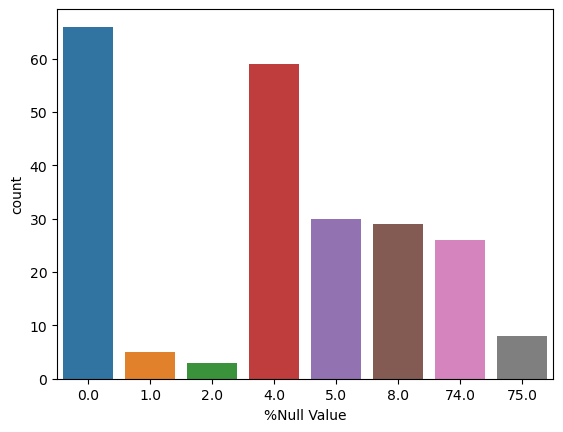

In [8]:
#Check for  Null values
df = pd.DataFrame(100*raw_churn_data.isnull().sum()/len(raw_churn_data),columns=['%Null Value']).reset_index()
cols = df[df['%Null Value']<30]['index'].tolist()
sns.countplot(x=round(df['%Null Value']),data=df)

In [9]:
churn_data = raw_churn_data[cols]
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,9/28/2014,252,252,252,0,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,9/30/2014,44,23,30,0,0.00,1.00,2.00,0.00,154.00,50.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,9/29/2014,0,200,86,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,9/30/2014,30,50,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,9/28/2014,50,110,110,50,1.00,0.00,0.00,56.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.00,0.00,0.00,0.00


In [10]:
date_col = churn_data.describe(include='O').columns.tolist()

In [11]:
churn_data.drop(date_col,inplace=True,axis=1)

In [12]:
#Removing columns with constant value
churn_data = churn_data.loc[:,churn_data.apply(pd.Series.nunique) != 1]
churn_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,0,252,252,252,0,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,...,50,44,23,30,0,0.00,1.00,2.00,0.00,154.00,50.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,7001625959,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,...,100,0,200,86,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,7001204172,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,...,50,30,50,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,7000142493,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,...,50,50,110,110,50,1.00,0.00,0.00,56.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.00,0.00,0.00,0.00


In [13]:
churn_data.loc[:,churn_data.columns.str.contains("arpu")]

,arpu_6,arpu_7,arpu_8,arpu_9
0,197.38,214.82,213.80,21.10
1,34.05,355.07,268.32,86.28
2,167.69,189.06,210.23,290.71
3,221.34,251.10,508.05,389.50
4,261.64,309.88,238.17,163.43
...,...,...,...,...
99994,18.47,69.16,57.53,29.95
99995,112.20,77.81,79.08,140.84
99996,229.19,0.00,0.00,0.00
99997,322.99,303.39,606.82,731.01


In [14]:
#Removing insignificant columns
churn_data.pop('mobile_number')

0        7000842753
1        7001865778
2        7001625959
3        7001204172
4        7000142493
            ...    
99994    7001548952
99995    7000607688
99996    7000087541
99997    7000498689
99998    7001905007
Name: mobile_number, Length: 99999, dtype: int64

In [15]:
max(churn_data.loc[:,churn_data.isnull().sum() != 0].isnull().sum()/len(churn_data))

0.07745077450774508

In [16]:
#Let's identify the  categorical Variables
churn_data.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00",...,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,282.99,278.54,279.15,261.65,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,3.66,1.12,1.37,1.43,1.23,144.20,141.67,141.33,138.71,...,101.94,63.16,59.39,62.64,43.90,0.62,0.68,0.70,48.45,51.39,52.03,51.90,51.23,50.17,44.72,121.40,129.00,135.41,136.06,0.08,0.08,0.08,0.07,0.39,0.44,0.45,0.39,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.08,"1,219.85",68.17,66.84,60.02,3.30
std,328.44,338.16,344.47,342.00,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,13.46,5.45,7.53,6.78,5.62,251.75,248.73,245.91,245.93,...,125.38,97.36,95.92,104.43,90.81,1.76,1.92,1.96,127.74,132.63,131.18,213.36,212.30,212.35,198.65,544.25,541.49,558.78,577.39,0.30,0.30,0.30,0.28,1.50,1.64,1.63,1.35,0.36,0.39,0.38,0.38,0.57,0.63,0.66,0.65,954.73,267.58,271.20,253.94,32.41
min,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,93.41,86.98,84.13,62.69,7.38,6.66,6.46,5.33,34.73,32.19,31.63,27.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.66,1.63,1.60,1.36,9.88,10.02,9.81,8.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.11,17.48,17.11,15.56,...,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,467.00,0.00,0.00,0.00,0.00
50%,197.70,191.64,192.08,176.85,34.31,32.33,32.36,29.84,96.31,91.73,92.

In [17]:
churn_data.loc[:,churn_data.apply(pd.Series.nunique) <= 10].columns

Index(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9'], dtype='object')

In [18]:
churn_data_new = pd.DataFrame(churn_data,columns=churn_data.columns)

In [19]:
churn_data_new.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,0,252,252,252,0,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,...,50,44,23,30,0,0.00,1.00,2.00,0.00,154.00,50.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,...,100,0,200,86,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,...,50,30,50,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,...,50,50,110,110,50,1.00,0.00,0.00,56.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1526,0.00,0.00,0.00,0.00


In [20]:
churn_data_new.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00",...,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,282.99,278.54,279.15,261.65,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,3.66,1.12,1.37,1.43,1.23,144.20,141.67,141.33,138.71,...,101.94,63.16,59.39,62.64,43.90,0.62,0.68,0.70,48.45,51.39,52.03,51.90,51.23,50.17,44.72,121.40,129.00,135.41,136.06,0.08,0.08,0.08,0.07,0.39,0.44,0.45,0.39,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.08,"1,219.85",68.17,66.84,60.02,3.30
std,328.44,338.16,344.47,342.00,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,13.46,5.45,7.53,6.78,5.62,251.75,248.73,245.91,245.93,...,125.38,97.36,95.92,104.43,90.81,1.76,1.92,1.96,127.74,132.63,131.18,213.36,212.30,212.35,198.65,544.25,541.49,558.78,577.39,0.30,0.30,0.30,0.28,1.50,1.64,1.63,1.35,0.36,0.39,0.38,0.38,0.57,0.63,0.66,0.65,954.73,267.58,271.20,253.94,32.41
min,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,93.41,86.98,84.13,62.69,7.38,6.66,6.46,5.33,34.73,32.19,31.63,27.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.66,1.63,1.60,1.36,9.88,10.02,9.81,8.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.11,17.48,17.11,15.56,...,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,467.00,0.00,0.00,0.00,0.00
50%,197.70,191.64,192.08,176.85,34.31,32.33,32.36,29.84,96.31,91.73,92.

In [21]:

churn_data_new.loc[:,churn_data_new.isnull().sum()!=0]

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,...,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
0,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,...,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN
1,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,...,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,...,14.38,15.44,38.89,38.98,99.48,122.29,49.63,158.19,229.56,208.86,155.99,345.41,72.41,71.29,28.69,49.44,45.18,177.01,167.09,118.18,21.73,58.34,43.23,3.86,139.33,306.66,239.03,171.49,0.21,0.00,0.00,0.45,0.00,0.85,0.00,0.01,0.93,3.14,0.00,0.36
3,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,...,113.96,64.51,20.28,52.86,57.43,27.09,19.84,65.59,233.48,111.59,48.18,160.19,43.48,66.44,0.00,129.84,1.33,38.56,4.94,13.98,1.18,0.00,0.00,0.00,45.99,105.01,4.94,143.83,0.59,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80
4,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,0.00,0.00,0.00,...,106.84,109.54,104.13,48.24,1.50,0.00,0.00,0.00,214.03,198.04,337.94,202.81,0.00,0.00,0.86,2.31,1.93,0.25,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.25,0.86,2.31,0.00,0.00,0.00,0.18,0.00,0.00,0.00,0.00,0.48,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.00,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.00,0.00,0.00,...,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.

In [22]:
#Checking the CAP data with 99 percentile values
cap_value_99 = churn_data_new.describe(percentiles=[0.99]).loc['99%',:]

In [23]:
cap_value_99.head()

arpu_6        1,410.79
arpu_7        1,428.69
arpu_8        1,455.54
arpu_9        1,402.45
onnet_mou_6   1,431.76
Name: 99%, dtype: float64

In [24]:
#Copying the data into new df
churn_data_check = churn_data_new.copy(deep=True)

In [25]:
cap_value_99
for index, value in cap_value_99.items():
  churn_data_check[index] = np.where( churn_data_check[index] > value, value, churn_data_check[index])
 


In [26]:
#lets desscribe all numeric columns 
churn_data_check.describe()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,...,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00",...,"99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,276.75,272.26,272.72,255.27,125.25,126.20,125.47,122.47,190.96,189.50,189.05,182.91,7.54,4.66,4.90,4.08,11.22,7.42,7.38,6.07,41.03,40.08,40.02,38.83,89.34,87.73,88.19,86.52,3.29,3.34,3.25,3.22,0.94,1.12,1.21,1.05,137.86,135.38,135.34,132.59,...,98.69,60.31,56.67,60.12,41.32,0.58,0.65,0.66,45.18,48.09,48.90,45.96,44.96,43.96,38.96,104.88,112.18,118.70,118.13,0.07,0.08,0.07,0.06,0.36,0.40,0.41,0.37,0.07,0.07,0.08,0.08,0.05,0.05,0.06,0.06,"1,219.39",60.88,59.23,52.73,1.80
std,269.03,271.33,275.73,271.57,240.33,248.03,246.52,242.66,265.73,269.21,266.88,263.90,30.07,20.43,21.48,18.44,41.15,30.38,30.55,26.02,82.58,80.87,79.90,77.47,130.98,128.94,129.26,127.76,8.54,8.66,8.49,8.50,3.11,3.61,3.82,3.38,201.13,197.98,196.70,194.32,...,101.05,73.85,74.38,81.60,68.70,1.46,1.62,1.63,101.33,107.06,108.01,156.71,153.72,151.92,140.34,349.53,365.84,380.47,385.56,0.26,0.26,0.26,0.24,1.23,1.33,1.34,1.16,0.30,0.31,0.32,0.32,0.27,0.28,0.28,0.29,953.43,201.67,202.55,185.21,10.68
min,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,93.41,86.98,84.13,62.69,7.38,6.66,6.46,5.33,34.73,32.19,31.63,27.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.66,1.63,1.60,1.36,9.88,10.02,9.81,8.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.11,17.48,17.11,15.56,...,28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,467.00,0.00,0.00,0.00,0.00
50%,197.70,191.64,192.08,176.85,34.31,32.33,32.36,29.84,96.31,91.73,92.14,87.29,0

In [27]:
#lets identify the high churn customers
churn_data_check['total_rech_amt_data_6'] = churn_data_check.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
churn_data_check['total_rech_amt_data_7'] = churn_data_check.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [28]:
## Creating average amount KPI for both data + talktime

churn_data_check['avg_rech_amt_6_7'] = churn_data_check.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

In [29]:
#lets describe the percentiles wise data
churn_data_check['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count   99,999.00
mean       448.62
std        543.41
min          0.00
10%         60.00
20%        108.50
30%        155.00
40%        209.50
50%        275.00
60%        360.00
70%        477.50
80%        656.00
90%      1,017.00
max      6,758.01
Name: avg_rech_amt_6_7, dtype: float64

In [30]:
amt_70_percent = churn_data_check['avg_rech_amt_6_7'].describe(percentiles=[0.70]).get('70%')
amt_70_percent

477.5

In [31]:
churn_data_check = churn_data_check[churn_data_check['avg_rech_amt_6_7'] >= amt_70_percent]

In [32]:
print(len(churn_data_check))

30014


### Lets do the  Data Labeling using 9th month dataset

In [33]:
# Function used for labeling data
def check_zero(*var):
  sum_l = sum(var)
  if (sum_l==0):
    return 1
  else:
    return 0
churn_data_check['label'] = churn_data_check.apply(lambda x: check_zero(x.total_ic_mou_9, x.total_og_mou_9,x.vol_2g_mb_9,x.vol_3g_mb_9), axis=1)

In [34]:
churn_data_check = churn_data_check.loc[:,~churn_data_check.columns.str.contains("_9")]

In [35]:
#lets find the  Categorical and numerical Varialbles
churn_data_check.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,label
count,"30,014.00","30,014.00","30,014.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00","29,477.00","28,839.00","29,468.00",...,"30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00","30,014.00"
mean,537.71,540.01,488.29,243.77,249.91,222.26,357.99,360.45,326.64,12.10,7.97,8.40,19.02,13.46,13.40,70.62,70.56,66.85,153.42,154.20,147.07,5.25,5.34,5.09,1.33,1.55,1.50,240.20,241.20,228.46,148.64,157.22,135.42,160.87,167.32,142.33,1.12,1.08,1.00,327.84,...,559.94,159.20,160.80,151.34,92.10,91.94,86.04,1.55,1.74,1.51,119.67,128.74,112.45,110.43,107.85,91.04,290.99,314.87,299.64,0.15,0.16,0.14,0.96,1.08,0.94,0.20,0.20,0.19,0.14,0.15,0.12,"1,208.99",148.11,155.28,135.81,4.11,361.45,428.46,"1,030.06",0.08
std,324.29,326.76,351.68,354.86,368.58,347.06,381.58,386.96,368.56,39.67,27.94,29.11,57.87,43.71,43.44,115.15,113.81,109.80,186.51,184.89,182.30,11.31,11.46,11.10,3.72,4.24,4.25,285.65,282.34,276.27,301.66,318.58,295.69,298.28,310.57,281.14,4.22,4.05,3.87,500.97,...,423.53,119.61,120.09,120.29,91.95,93.99,100.12,2.25,2.51,2.35,147.13,155.59,150.37,231.97,228.26,211.03,554.28,579.81,579.57,0.36,0.37,0.35,2.01,2.17,2.00,0.49,0.51,0.49,0.44,0.45,0.42,956.08,303.72,316.59,288.43,16.08,663.68,787.21,680.81,0.27
min,"-2,258.71","-2,014.05",-945.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00,477.50,0.00
25%,309.87,309.90,231.61,19.26,18.21,14.27,78.67,76.13,58.77,0.00,0.00,0.00,0.00,0.00,0.00,5.03,5.29,3.84,21.16,22.94,17.58,0.00,0.00,0.00,0.00,0.00,0.00,36.01,37.76,29.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71,...,250.00,110.00,110.00,50.00,25.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,0.00,0.00,0

All  columns from 6 to 9 can be dropped due to  constant for all months or single column with 0 variance

In [36]:
#Checking null value columns, If sum = 0 -> No Null values and vice-versa
null_column_names = churn_data_check.loc[:,churn_data_check.isnull().sum() !=0].columns.tolist()


In [37]:
null_column_names

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [38]:
#Check count for churn customers
from collections import Counter
Counter(churn_data_check['label'])

Counter({1: 2442, 0: 27572})

## Perform EDA on Prepared Dataset (Univariate and Bivariate Analysis)

<AxesSubplot:xlabel='label', ylabel='count'>

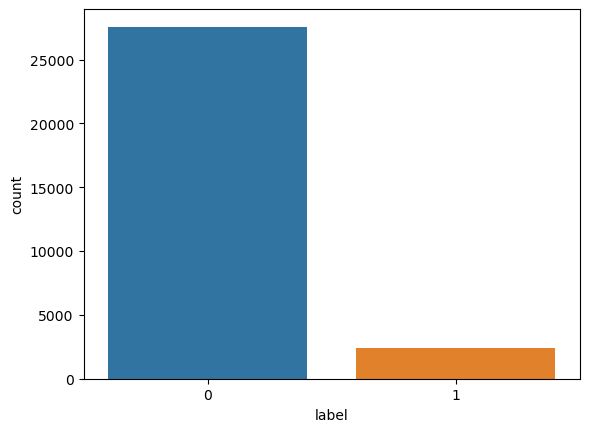

In [39]:
#plot the dataset with label count
sns.countplot(x='label',data=churn_data_check)

In [40]:
# Percentage of labels
data = churn_data_check.groupby('label')['label'].count()
label =100*data/len(churn_data_check)
label

label
0   91.86
1    8.14
Name: label, dtype: float64

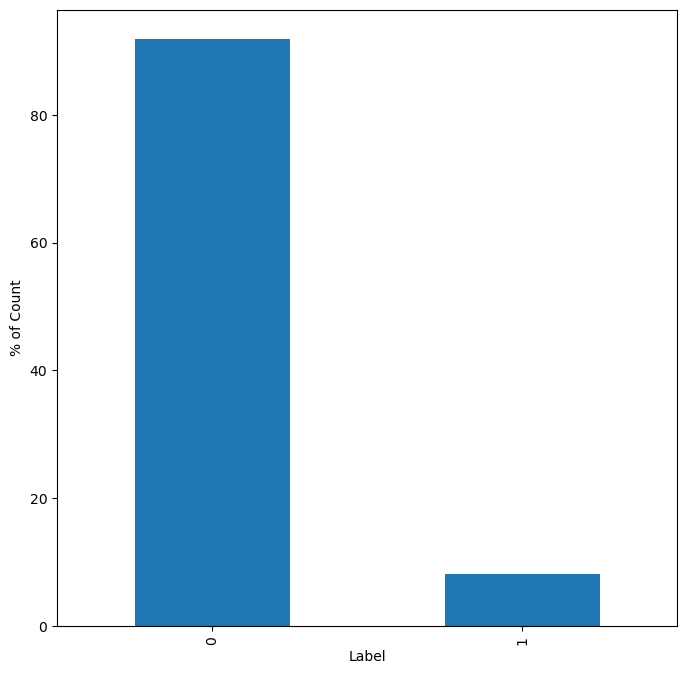

In [41]:
# % label plot
plt.figure(figsize=(8,8))
label.plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("% of Count")
plt.show()

In [42]:
churn_data_check[['arpu_6','arpu_7','arpu_8']].mean()

arpu_6   537.71
arpu_7   540.01
arpu_8   488.29
dtype: float64

In [43]:
print(churn_data_check[churn_data_check['label']==1]['total_rech_amt_6'].mean())
print(churn_data_check[churn_data_check['label']==1]['total_rech_amt_7'].mean())
print(churn_data_check[churn_data_check['label']==1]['total_rech_amt_8'].mean())

732.9406552006562
590.8513513513514
240.53644553644554


In [44]:
print(churn_data_check[churn_data_check['label']==0]['total_rech_amt_6'].mean())
print(churn_data_check[churn_data_check['label']==0]['total_rech_amt_7'].mean())
print(churn_data_check[churn_data_check['label']==0]['total_rech_amt_8'].mean())

626.2229406644321
639.2450674597418
588.2313216306397


In [45]:
churn_data_1 = churn_data_check.copy(deep=True)

<AxesSubplot:ylabel='Density'>

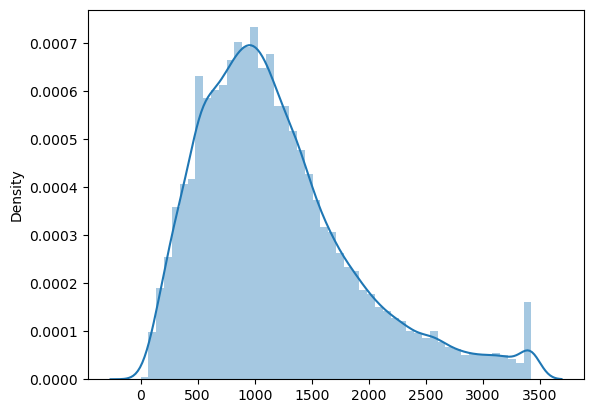

In [46]:
# Distribution plot for total Recharge amount
sns.distplot(((churn_data_1['total_rech_amt_6']+churn_data_1['total_rech_amt_7'])/2+churn_data_1['total_rech_amt_8']))

## Univariate analysis

<AxesSubplot:>

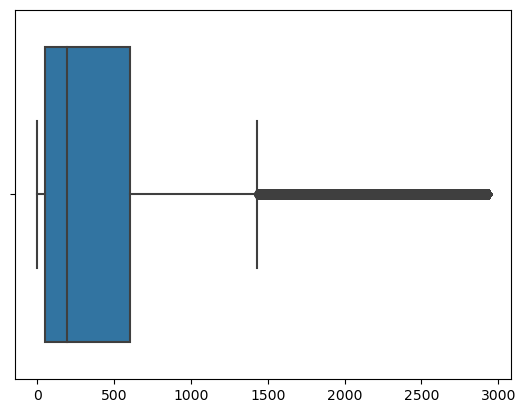

In [47]:
sns.boxplot((churn_data_1['onnet_mou_6']+churn_data_1['onnet_mou_7'])/2+churn_data_1['onnet_mou_8'])

In [48]:
#lets Calculate and distribution plot w.r.t Mean and Sum
def generalinfoDist(col):
  print("Mean of column  {0}".format(col.mean()))
  print("Sum of column  {0}".format(col.sum()))
  sns.distplot(col)

Mean of column  581.9653421270256
Sum of column  17467107.77860001


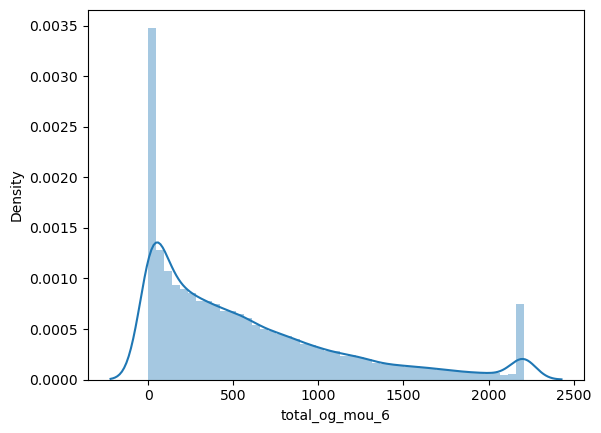

In [49]:
generalinfoDist(churn_data_1['total_og_mou_6'])

Mean of column  1704.2956819017477
Sum of column  51152730.59660001


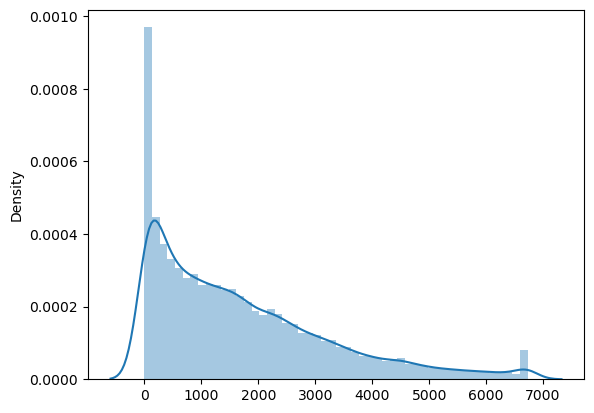

In [50]:
generalinfoDist(churn_data_1['total_og_mou_6']+churn_data_1['total_og_mou_7']+churn_data_1['total_og_mou_8'])

Mean of column  829.2085376157777
Sum of column  24887865.048000008


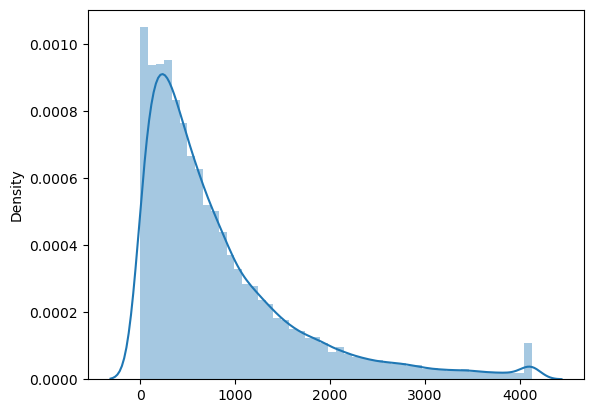

In [51]:
generalinfoDist(churn_data_1['total_ic_mou_6']+churn_data_1['total_ic_mou_7']+churn_data_1['total_ic_mou_8'])

In [52]:
def uniBoxPlot(col):
  print("Mean of column  {0}".format(col.mean()))
  print("Sum of column  {0}".format(col.sum()))
  sns.boxplot(col)

Mean of column  581.9653421270256
Sum of column  17467107.77860001


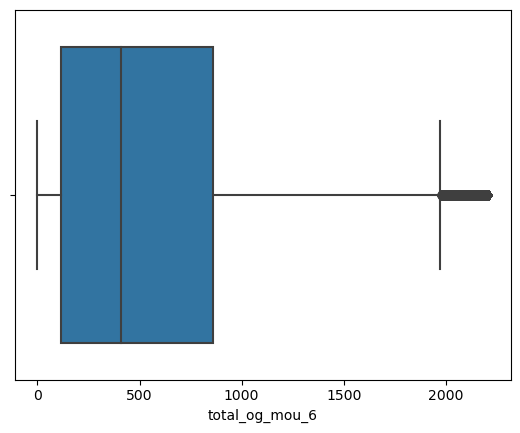

In [53]:
uniBoxPlot(churn_data_1['total_og_mou_6'])

## Bivariate analysis

In [54]:
# Churn customers are showing decline in total outgoing calls
def bivariate_label_mean_plt(df,cols,titles,label='label'):
  
  df.groupby(label)[cols].mean().plot(kind='bar',figsize=(10,5),title=titles)

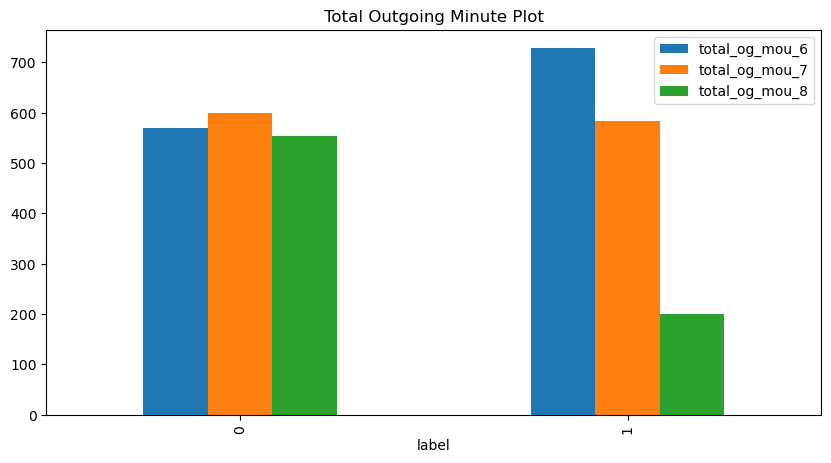

In [55]:
bivariate_label_mean_plt(churn_data_1,['total_og_mou_6','total_og_mou_7','total_og_mou_8'],"Total Outgoing Minute Plot")

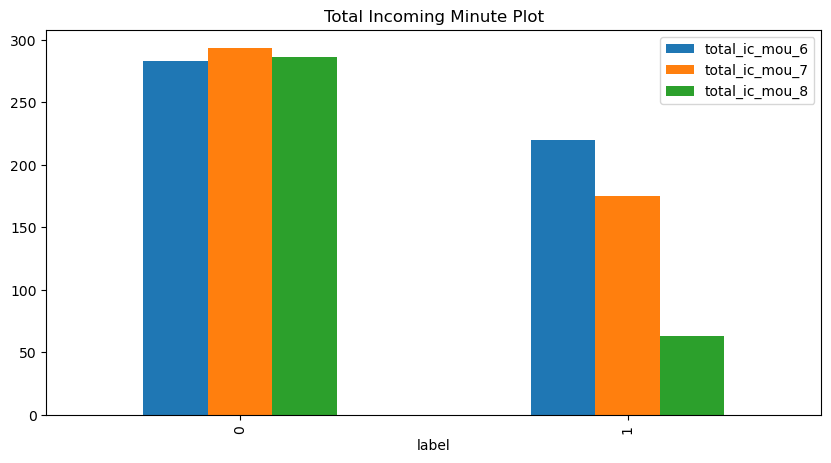

In [56]:
# Churn customers are also showing decline in total incoming calls
bivariate_label_mean_plt(churn_data_1,['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'],"Total Incoming Minute Plot")

In [57]:
#Deriving the feature using AON column
churn_data_1["aon_year"] = churn_data_1["aon"]/365


In [58]:
churn_data_1[["aon_year"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30014 entries, 0 to 99997
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aon_year  30014 non-null  float64
dtypes: float64(1)
memory usage: 469.0 KB


In [59]:
bins = [0, 1.5, 2.5, 3.5, 4.5, 5.50, 6.5,7.5,8.5,9.5,10,99]
labels = [0,1,2,3,4,5,6,7,8,9,10]
churn_data_1['aon_year'] = pd.cut(x=churn_data_1['aon_year'],bins=bins,labels=labels)

In [60]:
churn_data_1[["aon_year"]].isnull().sum()

aon_year    0
dtype: int64

In [61]:
Counter(churn_data_1['aon_year'])

Counter({2: 3697,
         1: 5750,
         0: 10080,
         3: 2367,
         5: 1440,
         8: 997,
         4: 1555,
         7: 1549,
         6: 1818,
         9: 232,
         10: 529})

<AxesSubplot:xlabel='aon_year', ylabel='count'>

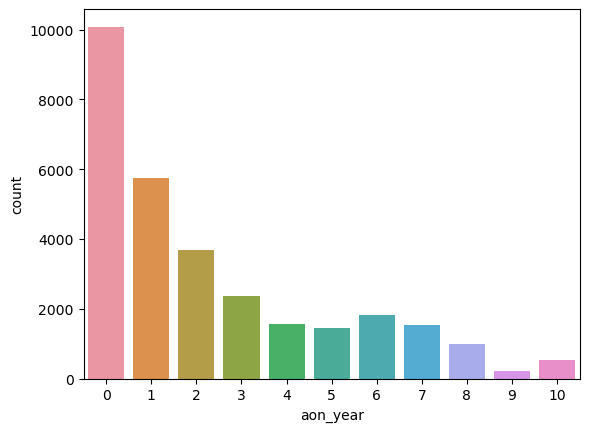

In [62]:
#lets derive the counter plot w.r.t to aon year
sns.countplot(x='aon_year',data=churn_data_1)


#### As per above graph, Churn ratio is more in first 3 years.

<AxesSubplot:xlabel='label,aon_year'>

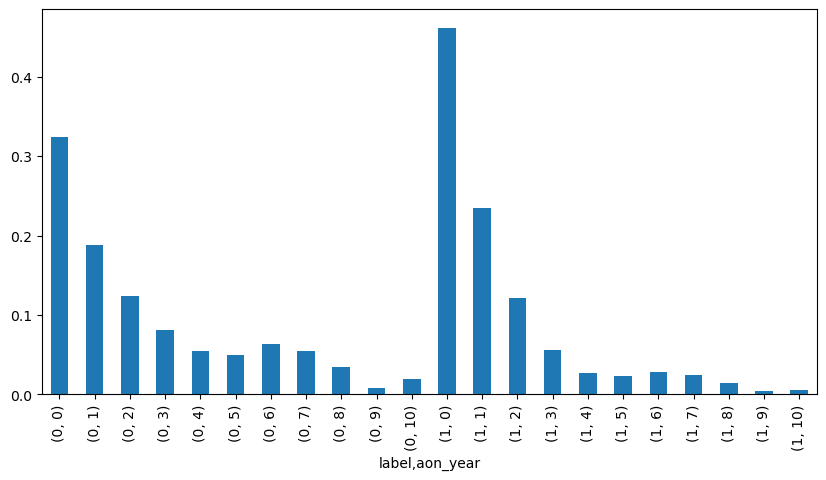

In [63]:
(churn_data_1.groupby(['label','aon_year'])['aon_year'].count()/churn_data_1.groupby('label')['aon_year'].count()).plot(kind='bar',figsize=(10,5))

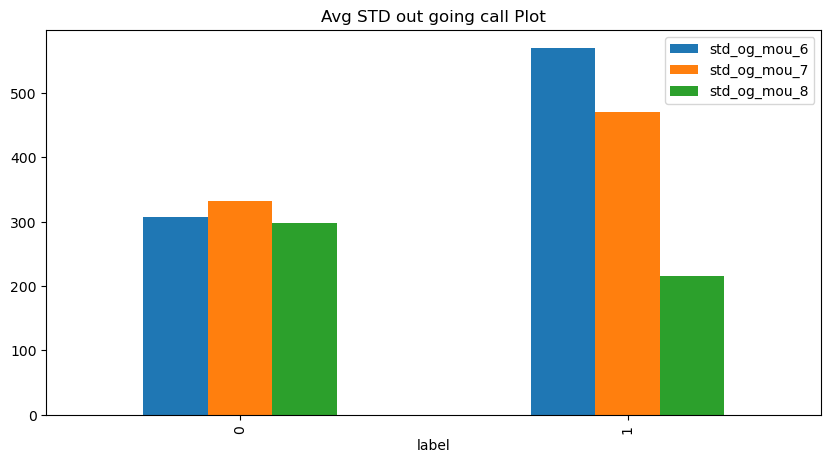

In [64]:
#lets plot the average STD outgoing call plot
bivariate_label_mean_plt(churn_data_1,['std_og_mou_6','std_og_mou_7','std_og_mou_8'],"Avg STD out going call Plot")

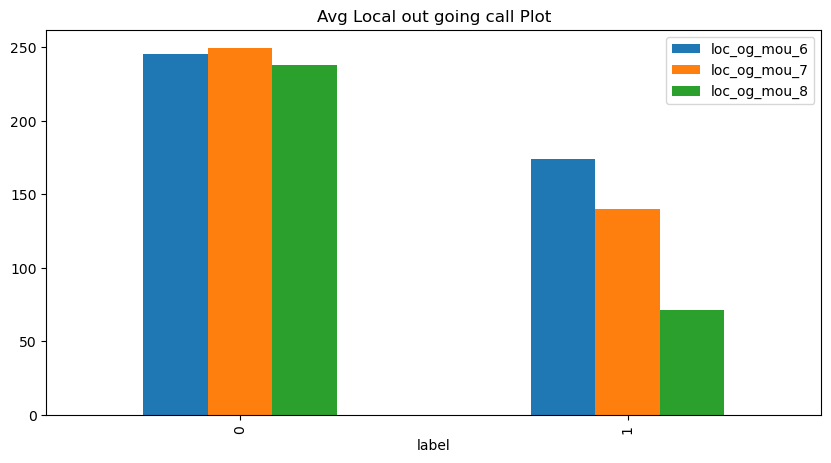

In [65]:
#Plotting the local outgoing call plot
bivariate_label_mean_plt(churn_data_1,['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],"Avg Local out going call Plot")

In [66]:
#Derived variable Total Amount per Recharge using total recharge
churn_data_1['amt_per_rech_6'] = churn_data_1['total_rech_amt_6']/churn_data_1['total_rech_num_6']
churn_data_1['amt_per_rech_7'] = churn_data_1['total_rech_amt_7']/churn_data_1['total_rech_num_7']
churn_data_1['amt_per_rech_8'] = churn_data_1['total_rech_amt_8']/churn_data_1['total_rech_num_8']

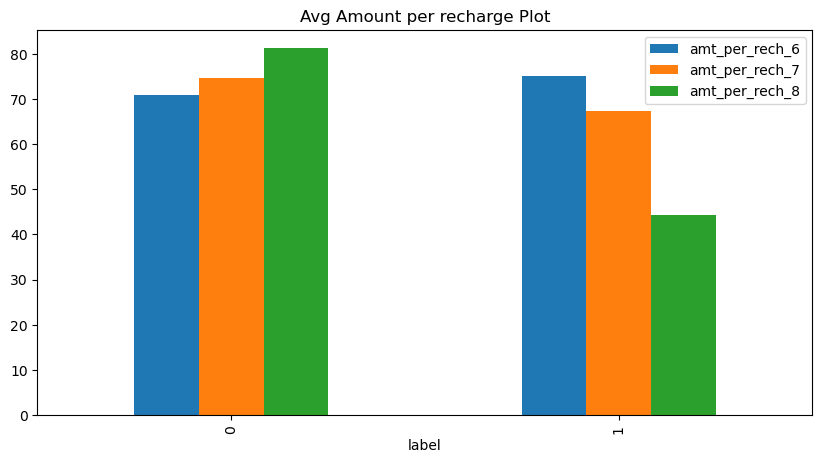

In [67]:
#Average Amount per Recharge plot
bivariate_label_mean_plt(churn_data_1,['amt_per_rech_6','amt_per_rech_7','amt_per_rech_8'],"Avg Amount per recharge Plot")

In [68]:
# Derived new column using usage Ratio
def usageRatio(row):
    if ((row['total_og_mou_6'] + row['total_ic_mou_6'] + row['vol_2g_mb_6'] + row['vol_3g_mb_6'] + row['total_og_mou_7'] + row['total_ic_mou_7'] + row['vol_2g_mb_7'] + row['vol_3g_mb_7'])/2  > 
    (row['total_og_mou_8'] + row['total_ic_mou_8'] + row['vol_2g_mb_8'] + row['vol_3g_mb_8'])):
        return 1
    else:
        return 0
churn_data_1['usage_reduced'] = churn_data_1.apply(lambda row: usageRatio(row), axis=1)


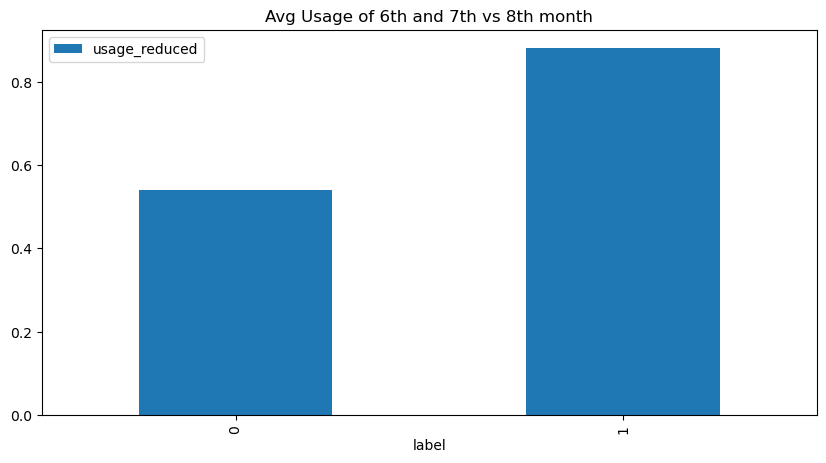

In [69]:
#plotting Average Usage of 6th and 7th vs 8th Month which is showing reduction in churn customers
bivariate_label_mean_plt(churn_data_1,['usage_reduced'],"Avg Usage of 6th and 7th vs 8th month")

In [70]:
# If Local outgoing calls are more than 0 else 1
def usageRatio(row):
    if ((row['loc_og_mou_6']+row['loc_og_mou_7']+row['loc_og_mou_8'] > row['std_og_mou_6']+row['std_og_mou_7']+row['std_og_mou_8'])):
        return 0
    else:
        return 1

In [71]:
churn_data_1['usage_loc_std'] = churn_data_1.apply(lambda row: usageRatio(row), axis=1)


<AxesSubplot:xlabel='label,usage_loc_std'>

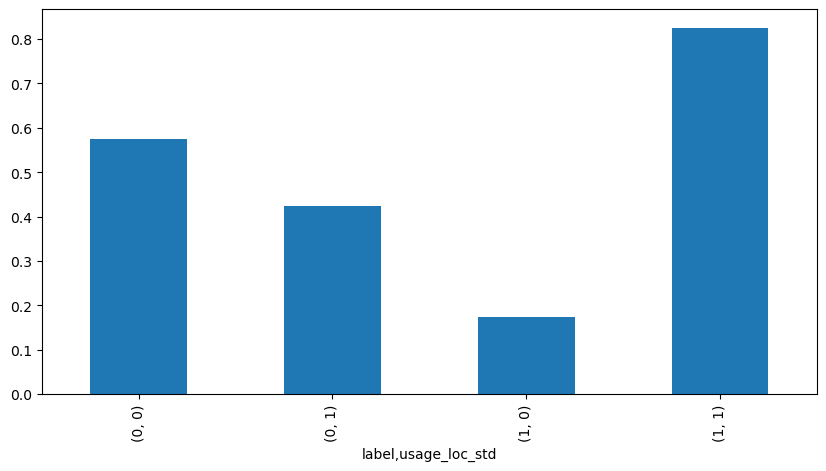

In [72]:
(churn_data_1.groupby(['label','usage_loc_std'])['usage_loc_std'].count()/churn_data_1.groupby('label')['usage_loc_std'].count()).plot(kind='bar',figsize=(10,5))




In [73]:
# If Less call 0 else 1
# customers with more call are less likely to Churn
def callToCustomer(row):
    if ((row['loc_og_t2c_mou_6'] + row['loc_og_t2c_mou_7'])/2  > row['loc_og_t2c_mou_8']):
        return 0
    else:
        return 1
churn_data_1['t2c_increased'] = churn_data_1.apply(lambda row: callToCustomer(row), axis=1)


<AxesSubplot:xlabel='label,t2c_increased'>

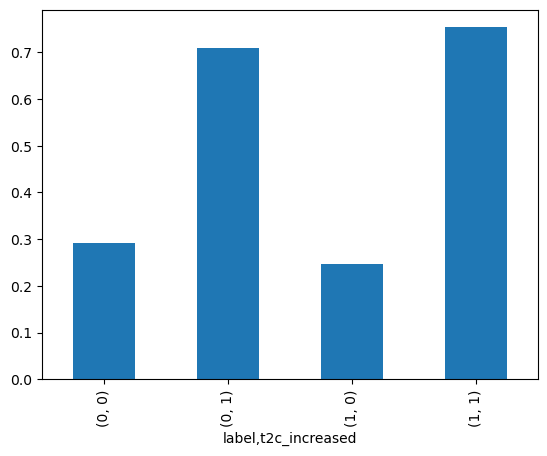

In [74]:
(churn_data_1.groupby(['label','t2c_increased'])['t2c_increased'].count()/churn_data_1.groupby('label')['t2c_increased'].count()).plot(kind='bar')

In [75]:
# if 2g then 0 else 1
def usageRatio(row):
    if (( row['vol_2g_mb_6'] + row['vol_2g_mb_7'] + row['vol_2g_mb_8']  >  row['vol_3g_mb_6']+row['vol_3g_mb_7']+row['vol_3g_mb_8'])):
        return 0
    else:
        return 1
churn_data_1['usage_2g_3g'] = churn_data_1.apply(lambda row: usageRatio(row), axis=1)


<AxesSubplot:xlabel='label,usage_2g_3g'>

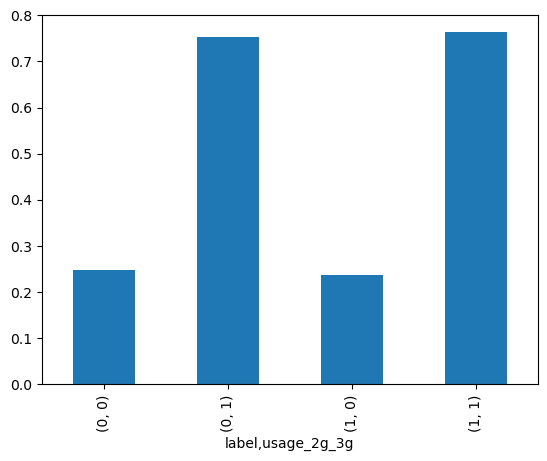

In [76]:
(churn_data_1.groupby(['label','usage_2g_3g'])['usage_2g_3g'].count()/churn_data_1.groupby('label')['usage_2g_3g'].count()).plot(kind='bar')



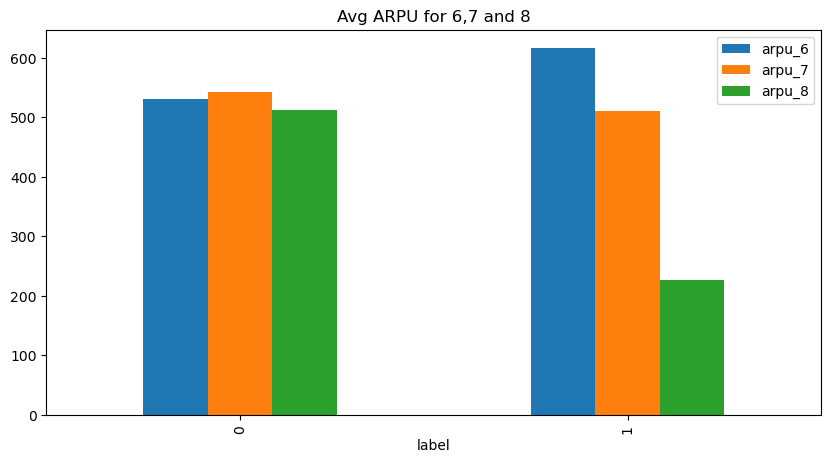

In [77]:
bivariate_label_mean_plt(churn_data_1,['arpu_6','arpu_7','arpu_8'],"Avg ARPU for 6,7 and 8")

In [78]:
churn_data_2 = churn_data_1.copy()

In [79]:
# Filling null values for Amount per recharge
churn_data_2[['amt_per_rech_8','amt_per_rech_7','amt_per_rech_6']] = churn_data_2[['amt_per_rech_8','amt_per_rech_7','amt_per_rech_6']].fillna(0,axis=1)



## Model Preparation

### Training and Testing set Data Split

In [80]:
y = churn_data_2.pop('label')

In [81]:
churn_data_2.fillna(0.0, inplace = True)  

In [82]:
X=churn_data_2

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [84]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 19286, 1: 1723})
Counter({0: 8286, 1: 719})


In [85]:
X_scaler = StandardScaler().fit(X_train)
Xtrain=X_scaler.transform(X_train) 
Xtest=X_scaler.transform(X_test) 


### Using  PCA 

In [86]:
pca = PCA(random_state=100)

In [87]:
pca.fit(Xtrain) 

PCA(random_state=100)

In [88]:
pca.explained_variance_ratio_


array([1.33297370e-01, 1.01151395e-01, 6.08108797e-02, 5.49419904e-02,
       4.34159666e-02, 3.09065059e-02, 2.76551158e-02, 2.58938956e-02,
       2.53967093e-02, 2.28876947e-02, 2.12399859e-02, 1.98860900e-02,
       1.89644262e-02, 1.64980668e-02, 1.58905135e-02, 1.40211171e-02,
       1.37036231e-02, 1.34747953e-02, 1.24800969e-02, 1.19027761e-02,
       1.15554328e-02, 1.07624719e-02, 9.92437913e-03, 9.64419621e-03,
       9.22585738e-03, 9.01704560e-03, 8.63145639e-03, 7.94265084e-03,
       7.78607217e-03, 7.63244206e-03, 7.33789847e-03, 7.04901082e-03,
       6.97203201e-03, 6.78627255e-03, 6.38177418e-03, 6.30976832e-03,
       5.94918535e-03, 5.58781022e-03, 5.38582656e-03, 5.21131333e-03,
       5.13361918e-03, 5.01443750e-03, 4.93064288e-03, 4.75310976e-03,
       4.56245680e-03, 4.44023861e-03, 4.14480103e-03, 4.02212970e-03,
       3.98322669e-03, 3.77414674e-03, 3.69242197e-03, 3.51079130e-03,
       3.47633576e-03, 3.41549819e-03, 3.33510169e-03, 3.28076177e-03,
      

In [89]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

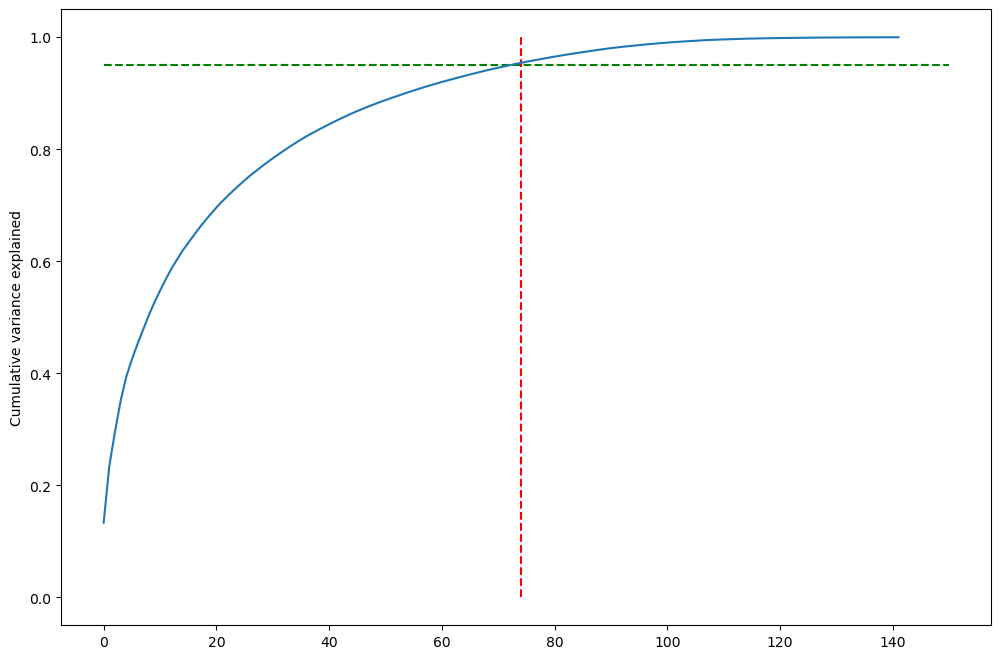

In [90]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=74, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(cum_sum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [91]:
pca_1 = PCA(n_components=74, random_state=100)

In [92]:
df_train_pca = pca_1.fit_transform(Xtrain)

In [93]:
df_test_pca = pca_1.transform(Xtest)

In [94]:
# Applying oversampling on PCA data
X_resample, y_resample = SMOTE(random_state=100).fit_resample(df_train_pca, y_train)

In [95]:
X_resample

array([[ 0.45453996,  2.13074015, -2.60844787, ...,  0.62467586,
        -0.4133885 , -0.12643234],
       [-0.67147533,  3.05193733,  7.35402595, ..., -0.0189997 ,
         0.75136783,  0.88982837],
       [ 2.84632958,  0.31431167,  1.86647566, ...,  0.34736151,
         0.39245717, -0.26941336],
       ...,
       [ 0.27739422, -7.50945754,  1.38972491, ...,  0.37829221,
        -0.52058995,  0.04104022],
       [-2.25853813, -3.21270537,  0.2928742 , ..., -0.4834752 ,
        -0.0857951 ,  0.73930231],
       [-3.7589593 , -3.22900048, -1.3770736 , ..., -0.10672862,
        -0.08806883,  0.18520007]])

In [96]:
print(X_resample.shape)

(38572, 74)


In [97]:
# Applying oversampling on train data
X_train_resample, y_train_resample = SMOTE(random_state=100).fit_resample(X_train, y_train)

In [98]:
X_train_resample = pd.DataFrame(X_train_resample,columns=X_train.columns)

In [99]:
print(X_train_resample.shape)
print(Counter(y_train_resample))

(38572, 142)
Counter({0: 19286, 1: 19286})


In [100]:
print(Counter(y_train))
print(Counter(y_resample))

Counter({0: 19286, 1: 1723})
Counter({0: 19286, 1: 19286})


In [101]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Function to fit the model and generate matrix

def checkMetrics(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_train_predict  = clf.predict(x_train)
  y_test_predict  = clf.predict(x_test)
  print("Train accuracy", metrics.accuracy_score(y_train, y_train_predict), "\n")  
  print("Train Recall", metrics.recall_score(y_train, y_train_predict), "\n")

  print("Test accuracy", metrics.accuracy_score(y_test, y_test_predict), "\n")
  print("Test Recall", metrics.recall_score(y_test, y_test_predict), "\n")
  print("Test AUC", metrics.roc_auc_score(y_test, y_test_predict), "\n")
  print("Train Report:","\n",classification_report(y_train,y_train_predict),"\n")

  print("Test Report:","\n",classification_report(y_test,y_test_predict),"\n")
  return y_train_predict,y_test_predict

In [102]:
def xgbCheckMetrics(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train,eval_metric='aucpr')
  y_train_predict  = clf.predict(x_train)
  y_test_predict  = clf.predict(x_test)
  print("Train accuracy", metrics.accuracy_score(y_train, y_train_predict), "\n")  
  print("Train Recall", metrics.recall_score(y_train, y_train_predict), "\n")

  print("Test accuracy", metrics.accuracy_score(y_test, y_test_predict), "\n")
  print("Test Recall", metrics.recall_score(y_test, y_test_predict), "\n")
  print("Test AUC", metrics.roc_auc_score(y_test, y_test_predict), "\n")
  print("Train Report:","\n",classification_report(y_train,y_train_predict),"\n")

  print("Test Report:","\n",classification_report(y_test,y_test_predict),"\n")
  return y_train_predict,y_test_predict

### Using Random Forest

In [103]:
rf_clf = RandomForestClassifier()
print(rf_clf)

RandomForestClassifier()


##### Random Forest - Hyperparameter Tuning : max_depth

In [104]:
rf_param_grid = {"max_depth": range(5,74,10)}

rf_cv=GridSearchCV(rf_clf,rf_param_grid,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)


In [105]:
rf_cv.fit(X_resample,y_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 74, 10)},
             return_train_score=True, scoring='roc_auc')

In [106]:
scores = rf_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,18.23,0.22,1.16,0.54,5,{'max_depth': 5},0.91,0.92,0.91,0.92,0.92,0.92,0.00,7,0.92,0.92,0.92,0.92,0.92,0.92,0.00
1,38.49,0.48,0.22,0.01,15,{'max_depth': 15},0.99,0.99,0.98,0.99,0.99,0.99,0.00,6,1.00,1.00,1.00,1.00,1.00,1.00,0.00
2,45.92,0.77,0.23,0.02,25,{'max_depth': 25},0.99,0.99,0.99,0.99,0.99,0.99,0.00,5,1.00,1.00,1.00,1.00,1.00,1.00,0.00
3,47.81,0.82,0.26,0.04,35,{'max_depth': 35},0.99,0.99,0.99,0.99,0.99,0.99,0.00,4,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,53.53,1.11,0.27,0.03,45,{'max_depth': 45},0.99,0.99,0.99,0.99,0.99,0.99,0.00,3,1.00,1.00,1.00,1.00,1.00,1.00,0.00


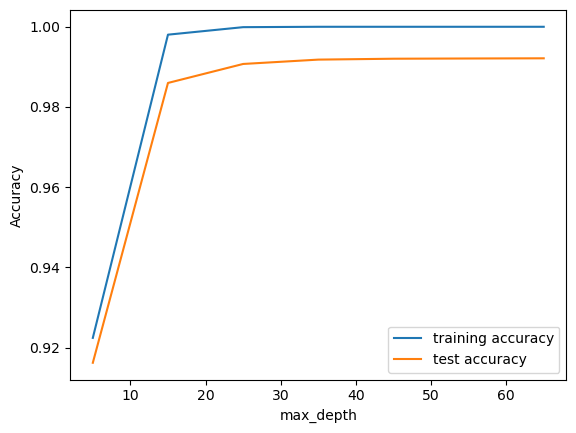

In [107]:
# plotting accuracies w.r.t max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Random Forest - Hyperparameter Tuning : min_samples_leaf

In [108]:
rf_param_grid = {"min_samples_leaf":range(100, 400, 50)}

rf_cv=GridSearchCV(rf_clf,rf_param_grid,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)
rf_cv.fit(X_resample,y_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='roc_auc')

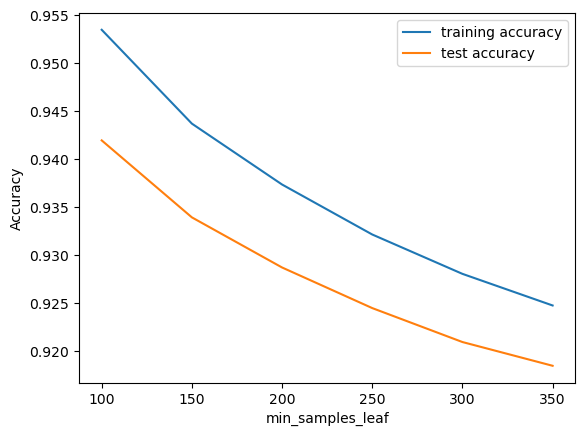

In [109]:
scores = rf_cv.cv_results_
# plotting accuracies w.r.t max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Random Forest - Hyperparameter Tuning : min_samples_split

In [110]:
rf_param_grid = {"min_samples_split":range(50, 250, 50)}

rf_cv=GridSearchCV(rf_clf,rf_param_grid,cv=5,scoring='roc_auc',n_jobs=-1,return_train_score=True)
rf_cv.fit(X_resample,y_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_split': range(50, 250, 50)},
             return_train_score=True, scoring='roc_auc')

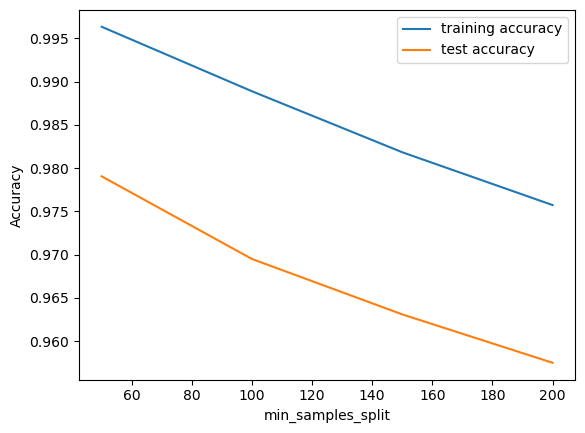

In [111]:
scores = rf_cv.cv_results_
# plotting accuracies w.r.t max_depth
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#####  RF - Optimal Hyperparameters

In [112]:
rf_clf=RandomForestClassifier(criterion='gini',max_depth=15,
                                              max_features='sqrt',
                                              min_samples_leaf=100,
                                              min_samples_split=50,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True,
                                              random_state=42, verbose=0,
                                              warm_start=False)

In [113]:
rf_y_train,rf_y_test = checkMetrics(rf_clf,X_resample,y_resample,df_test_pca,y_test)

Train accuracy 0.8840350513325729 

Train Recall 0.8575132220263404 

Test accuracy 0.8841754580788451 

Test Recall 0.6954102920723226 

Test AUC 0.7979827226714498 

Train Report: 
               precision    recall  f1-score   support

           0       0.86      0.91      0.89     19286
           1       0.91      0.86      0.88     19286

    accuracy                           0.88     38572
   macro avg       0.89      0.88      0.88     38572
weighted avg       0.89      0.88      0.88     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      8286
           1       0.38      0.70      0.49       719

    accuracy                           0.88      9005
   macro avg       0.67      0.80      0.71      9005
weighted avg       0.92      0.88      0.90      9005
 



In [114]:
## OOB for RF classifier
print(rf_clf.oob_score_)

0.8699574821113761


### Using XGboost 


In [115]:
xgb_clf = xgb.XGBClassifier(booster='gbtree',eta=0.1,max_depth=15,subsample=0.5,objective='multi:softmax',num_class=2,eval_metric='aucpr')

In [116]:
xgb_y_train,xgb_y_test=xgbCheckMetrics(xgb_clf,X_resample,y_resample,df_test_pca,y_test)

Train accuracy 0.9999740744581562 

Train Recall 1.0 

Test accuracy 0.9249305941143809 

Test Recall 0.5966620305980529 

Test AUC 0.7750387150335183 

Train Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19286
           1       1.00      1.00      1.00     19286

    accuracy                           1.00     38572
   macro avg       1.00      1.00      1.00     38572
weighted avg       1.00      1.00      1.00     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      8286
           1       0.53      0.60      0.56       719

    accuracy                           0.92      9005
   macro avg       0.75      0.78      0.76      9005
weighted avg       0.93      0.92      0.93      9005
 



### Using KNN

In [117]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance of KNN
        clf = KNeighborsClassifier(n_neighbors = i)
        print(i)
        clf.fit(X_resample, y_resample)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(df_test_pca)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [118]:
k = range(100, 1500, 150)

#####Elbow Classifer

In [119]:
# Calling Elbow defined function
test = Elbow(k)

100
250
400
550
700
850
1000
1150
1300
1450


Text(0.5, 1.0, 'Elbow Curve for test')

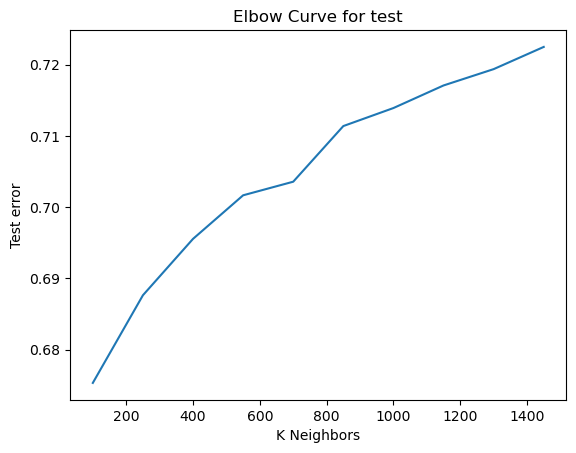

In [120]:
# Lets plot the Curves for label
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [121]:
# Creating instance of KNN
Knn_clf = KNeighborsClassifier(n_neighbors = 1200,weights='uniform',n_jobs=-1)

# Fit the model
knn_y_train,knn_y_test=checkMetrics(Knn_clf,X_resample,y_resample,df_test_pca,y_test)


Train accuracy 0.7715959763559058 

Train Recall 0.9225344809706523 

Test accuracy 0.6383120488617435 

Test Recall 0.8901251738525731 

Test AUC 0.7532933375900567 

Train Report: 
               precision    recall  f1-score   support

           0       0.89      0.62      0.73     19286
           1       0.71      0.92      0.80     19286

    accuracy                           0.77     38572
   macro avg       0.80      0.77      0.77     38572
weighted avg       0.80      0.77      0.77     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.62      0.76      8286
           1       0.17      0.89      0.28       719

    accuracy                           0.64      9005
   macro avg       0.58      0.75      0.52      9005
weighted avg       0.92      0.64      0.72      9005
 



### Using Logistic Regression

In [122]:
## Logistic regression wirh RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [123]:
clf_lr = LogisticRegression(class_weight='balanced')

In [124]:
selector = RFE(clf_lr,n_features_to_select=50, step=1)

In [125]:
X_train_resample.fillna(0.0, inplace = True)  
y_train_resample.fillna(0.0, inplace = True) 

In [126]:
selector.fit(X_train_resample,y_train_resample)

RFE(estimator=LogisticRegression(class_weight='balanced'),
    n_features_to_select=50)

In [127]:
select_feature = selector.support_.tolist()


In [128]:
X_train_RFE = X_train_resample.loc[:,select_feature]
X_train_RFE

,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,isd_ic_mou_6,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_8,total_rech_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_6,sachet_2g_6,sachet_2g_8,sep_vbc_3g,aon_year,amt_per_rech_6,usage_loc_std,t2c_increased,usage_2g_3g
0,0.00,337.28,285.86,25.59,38.03,0.00,0.16,0.00,0.00,363.04,323.89,0.00,24.29,37.18,0.00,0.00,0.00,4.98,0.98,366.81,54.51,38.48,337.14,237.91,0.00,0.00,0.00,0.56,0.56,0.00,0.00,0.00,18.00,8.00,626.00,50.00,2.00,1.00,115.00,98.00,14.06,0.00,2.00,1.00,16.15,5,32.89,0,1,1
1,0.00,19.86,1.86,32.16,28.26,18.90,17.21,0.26,0.00,69.24,43.69,0.60,11.66,280.78,0.00,0.00,0.00,6.98,0.00,324.48,9.66,10.03,31.24,17.08,72.21,85.79,42.90,8.86,181.96,6.53,0.00,17.33,10.00,6.00,400.00,200.00,4.00,2.00,489.00,504.00,18.62,0.00,0.00,0.00,0.00,3,60.00,1,0,1
2,0.00,83.13,54.46,286.96,350.21,0.93,14.11,0.00,0.00,384.21,438.24,0.16,0.00,481.38,0.00,0.00,0.00,0.00,0.00,926.53,16.93,27.84,70.24,240.91,28.01,16.53,0.00,0.90,49.28,0.00,0.00,0.00,11.00,10.00,"1,033.00",130.00,1.00,2.00,179.00,308.00,326.71,0.00,0.00,0.00,0.00,9,101.36,1,1,0
3,0.00,63.04,84.49,160.89,366.34,0.00,0.00,0.00,0.00,223.94,451.33,0.00,0.00,490.84,0.00,0.00,0.00,0.00,0.00,942.18,0.00,80.89,0.00,289.59,9.06,15.48,0.00,0.00,21.46,0.00,0.00,0.00,5.00,4.00,541.00,163.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,77.80,1,1,1
4,15.11,1.48,2.16,0.00,1.23,0.00,0.00,0.06,0.00,1.48,3.39,0.00,0.00,777.26,0.00,0.00,0.00,0.06,0.00,780.66,0.76,0.16,0.00,0.00,1.25,3.95,0.00,0.00,352.84,0.00,0.00,0.00,13.00,8.00,735.00,144.00,6.00,2.00,138.00,46.00,0.01,0.00,6.00,2.00,0.00,0,25.38,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38567,40.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,4.34,0.00,18.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,15.69,2.33,641.01,0.00,1.34,0.00,20.74,0.00,0.00,0.00,1.34,0.00,0.00,1,34.19,1,1,0
38568,0.00,130.04,36.01,270.29,141.44,18.20,24.63,0.00,4.93,424.97,187.95,0.00,0.00,66.98,0.00,0.00,0.00,6.33,0.08,267.68,203.73,55.68,328.71,181.32,4.24,4.21,0.53,0.59,5.15,0.00,0.00,0.14,5.96,4.00,654.83,17.27,0.96,0.96,172.20,13.47,0.00,0.00,0.00,0.96,0.00,0,120.23,0,1,1
38569,0.00,2.21,10.18,18.61,12.08,0.00,0.00,19.47,0.00,20.83,22.28,0.00,0.00,967.03,0.00,0.00,0.00,48.70,19.75,"1,016.63",0.56,0.42,28.76,6.44,0.14,0.68,0.00,0.00,1.18,0.00,0.00,0.00,8.47,7.91,829.38,47.64,0.24,0.00,1.77,0.00,0.00,0.00,0.24,0.00,0.00,0,66.94,1,0,1
38570,159.96,5.51,0.00,5.82,0.00,0.00,0.00,2.44,0.00,11.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.58,0.00,0.00,61.27,0.00,51.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,7.49,1.74,129.23,48.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,145.60,1,0,1


In [129]:
X_test_RFE = X_test.loc[:,select_feature]

In [130]:
#Grid Search
grid={"C":[0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_RFE,y_train_resample)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2'}
accuracy : 0.8455876041796453


In [131]:
scores_lrf = logreg_cv.cv_results_
pd.DataFrame(scores_lrf).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.01,0.01,0.00,0.00,0.00,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,0.51,0.01,0.00,0.01,0.00,l2,"{'C': 0.001, 'penalty': 'l2'}",0.83,0.85,0.85,0.85,0.84,0.85,0.85,0.84,0.86,0.84,0.85,0.01,2
2,0.01,0.01,0.00,0.00,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.54,0.05,0.00,0.00,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.83,0.85,0.85,0.85,0.83,0.85,0.84,0.85,0.85,0.84,0.85,0.01,3
4,0.01,0.01,0.00,0.00,0.10,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [132]:
clf_lr1 = LogisticRegression(C=.001, class_weight='balanced', dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False)

In [133]:
lr_y_train,lr_y_test = checkMetrics(clf_lr1,X_train_RFE,y_train_resample,X_test_RFE,y_test)

Train accuracy 0.841024577413668 

Train Recall 0.854454008088769 

Test accuracy 0.8238756246529706 

Test Recall 0.8191933240611962 

Test AUC 0.8217376226871271 

Train Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84     19286
           1       0.83      0.85      0.84     19286

    accuracy                           0.84     38572
   macro avg       0.84      0.84      0.84     38572
weighted avg       0.84      0.84      0.84     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.82      0.90      8286
           1       0.29      0.82      0.43       719

    accuracy                           0.82      9005
   macro avg       0.63      0.82      0.66      9005
weighted avg       0.93      0.82      0.86      9005
 



### Using Decision Tree and ADABOOST

In [134]:
dt_ada = DecisionTreeClassifier()
parameter_hyper ={"criterion":["gini","entropy"],"max_depth":[10,50,100,150],"min_samples_split":[10,20,30,40]}
dtc_ada_cv=GridSearchCV(dt_ada,parameter_hyper,cv=10,n_jobs=-1)

In [135]:
dt_ada = DecisionTreeClassifier(max_depth=50)
parameter_hyper ={"min_samples_leaf":[10,20,30,40]}
dtc_ada_cv_leaf=GridSearchCV(dt_ada,parameter_hyper,cv=5,n_jobs=-1,return_train_score=True)

In [136]:
dtc_ada_cv_leaf.fit(X_resample,y_resample)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=50), n_jobs=-1,
             param_grid={'min_samples_leaf': [10, 20, 30, 40]},
             return_train_score=True)

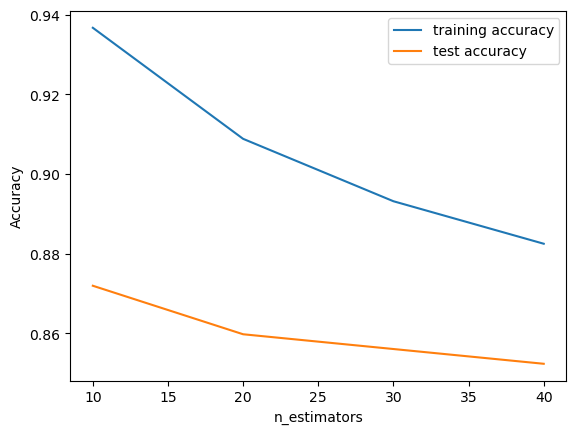

In [137]:
scores = dtc_ada_cv_leaf.cv_results_
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
dtc_ada_cv_leaf.best_params_

{'min_samples_leaf': 10}

In [139]:
dtc_ada_cv.fit(X_resample,y_resample)
print("tuned hpyerparameters :(best parameters) ",dtc_ada_cv.best_params_)
print("accuracy :",dtc_ada_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 10}
accuracy : 0.8977239715366068


In [140]:
ada_imp_dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 50, min_samples_split= 10,min_samples_leaf=10)

In [141]:
dt_y_train,dt_y_test=checkMetrics(ada_imp_dt,X_resample,y_resample,df_test_pca,y_test)

Train accuracy 0.9396453385875765 

Train Recall 0.935445400808877 

Test accuracy 0.8386451971127151 

Test Recall 0.5493741307371349 

Test AUC 0.7065601042292964 

Train Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     19286
           1       0.94      0.94      0.94     19286

    accuracy                           0.94     38572
   macro avg       0.94      0.94      0.94     38572
weighted avg       0.94      0.94      0.94     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      8286
           1       0.26      0.55      0.35       719

    accuracy                           0.84      9005
   macro avg       0.61      0.71      0.63      9005
weighted avg       0.90      0.84      0.86      9005
 



In [142]:
# Apply AdaBoost model on Decision tree

from sklearn.ensemble import AdaBoostClassifier
param_grid = {"learning_rate" :   [.01,.1,1],
              "n_estimators": [100],
              "algorithm":["SAMME.R"]
             }
adb_clf_1 = AdaBoostClassifier(base_estimator=ada_imp_dt,learning_rate=0.01)
print(adb_clf_1)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=50,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10),
                   learning_rate=0.01)


Test accuracy of Decision tree is 0.85 and  Test accuracy of Adaboost with Decision tree is 0.92. Here we can see Adaboost has boosted the accuracy of the model. However, it has reduced overall Test Recall, which is important in this case study

In [143]:
adb_y_train,adb_y_test=checkMetrics(adb_clf_1,X_resample,y_resample,df_test_pca,y_test)

Train accuracy 1.0 

Train Recall 1.0 

Test accuracy 0.9239311493614658 

Test Recall 0.5757997218358831 

Test AUC 0.7649696171332444 

Train Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19286
           1       1.00      1.00      1.00     19286

    accuracy                           1.00     38572
   macro avg       1.00      1.00      1.00     38572
weighted avg       1.00      1.00      1.00     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      8286
           1       0.52      0.58      0.55       719

    accuracy                           0.92      9005
   macro avg       0.74      0.76      0.75      9005
weighted avg       0.93      0.92      0.93      9005
 



### Using Support Vactor Machine

In [144]:

svc_y_train,svc_y_test=checkMetrics(SVC(kernel='linear'),X_resample,y_resample,df_test_pca,y_test)

Train accuracy 0.8576947008192471 

Train Recall 0.8617131598050399 

Test accuracy 0.8478622987229317 

Test Recall 0.8136300417246175 

Test AUC 0.8322313858152414 

Train Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     19286
           1       0.85      0.86      0.86     19286

    accuracy                           0.86     38572
   macro avg       0.86      0.86      0.86     38572
weighted avg       0.86      0.86      0.86     38572
 

Test Report: 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      8286
           1       0.32      0.81      0.46       719

    accuracy                           0.85      9005
   macro avg       0.65      0.83      0.69      9005
weighted avg       0.93      0.85      0.88      9005
 



#### Stacking
*Stacking* is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor.

In [145]:

x_train_stack = np.concatenate((
    lr_y_train.reshape(38572,1), 
   # dt_y_train.reshape(38572,1),
    rf_y_train.reshape(38572,1) ,
    svc_y_train.reshape(38572,1),
    knn_y_train.reshape(38572,1),
    #xgb_y_train.reshape(38572,1)
    ),axis=1)
type(x_train_stack)

numpy.ndarray

In [146]:
x_test_stack = np.concatenate(( lr_y_test.reshape(9005,1), 
                         #      dt_y_test.reshape(9005,1), 
                               rf_y_test.reshape(9005,1), 
                               svc_y_test.reshape(9005,1),
                              knn_y_test.reshape(9005,1),
                            #   xgb_y_test.reshape(9005,1)
                               ),axis=1)

In [147]:
x_train_stack = pd.DataFrame(x_train_stack,columns=['lr','rf','svc','knn'])

In [148]:
x_test_stack = pd.DataFrame(x_test_stack,columns=['lr','rf','svc','knn'])

In [149]:
x_train_stack.head()

,lr,rf,svc,knn
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1


#### Using XGBoost on Stacked data

In [150]:
gbm = xgb.XGBClassifier(n_jobs=-1)

In [151]:
print(gbm)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


In [152]:
gbm1 = xgb.XGBClassifier()

In [153]:
parameters = {'gamma':[0.1,0,1], 'learning_rate':[0.1,0.5,0.85],'max_depth':[3,10,15],'min_child_weight':[1,5,10]}

In [154]:
grid_stack = GridSearchCV(gbm1, param_grid=parameters, cv=5)

In [155]:
grid_stack.fit(x_train_stack,y_resample)

[12:20:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [156]:
grid_stack.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [157]:
parameters = {'gamma':[0.01,0.1,0,1], 'learning_rate':[0.01,0.1,0.2],'max_depth':[2,3,5],'min_child_weight':[1,5]}

In [158]:
grid_stack = GridSearchCV(gbm1, param_grid=parameters, cv=5)

In [159]:
grid_stack.fit(x_train_stack,y_resample)

[12:27:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [160]:
grid_stack.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [161]:
gbm2 =xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Below results are showing that there is a boost in the accuracy with stacking where as no improvement found in recall.

In [162]:
#Lets do Feature selection using RFE
clf_lr_imp_fea = LogisticRegression(class_weight='balanced')

In [163]:
rfe_imp_f = RFE(clf_lr_imp_fea)

In [164]:
rfe_imp_f.fit(X_train,y_train)

RFE(estimator=LogisticRegression(class_weight='balanced'))

In [165]:
rfe_imp_feature = pd.DataFrame(rfe_imp_f.ranking_,index=X_train.columns,columns=["value"])

<AxesSubplot:>

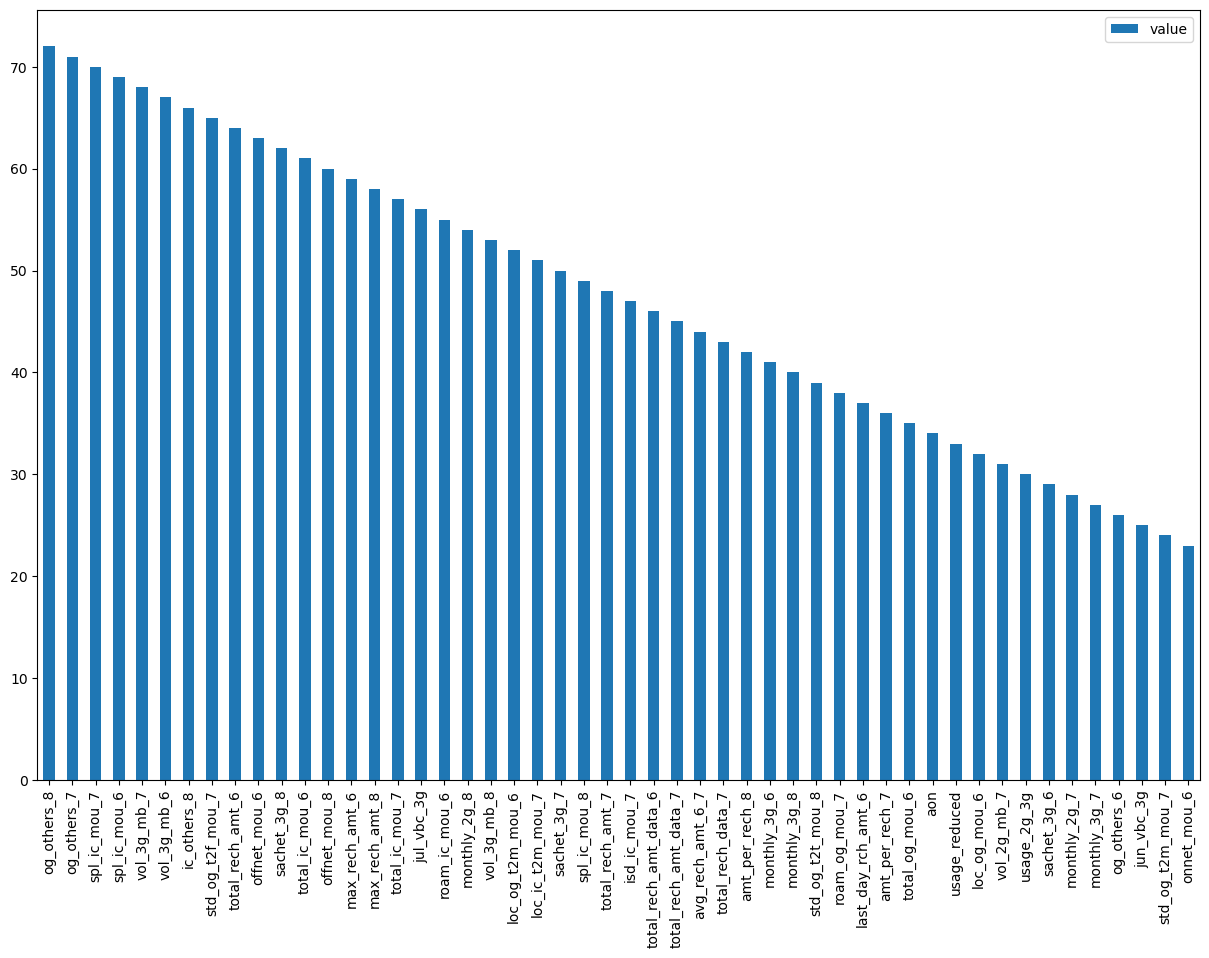

In [166]:
rfe_imp_feature = rfe_imp_feature.sort_values(by='value', ascending=False).head(50)
rfe_imp_feature.plot(figsize=(15,10),kind='bar')

In [167]:
#Top 25 features
rfe_top_25 = rfe_imp_feature.index.to_list()[0:25]
rfe_top_25

['og_others_8',
 'og_others_7',
 'spl_ic_mou_7',
 'spl_ic_mou_6',
 'vol_3g_mb_7',
 'vol_3g_mb_6',
 'ic_others_8',
 'std_og_t2f_mou_7',
 'total_rech_amt_6',
 'offnet_mou_6',
 'sachet_3g_8',
 'total_ic_mou_6',
 'offnet_mou_8',
 'max_rech_amt_6',
 'max_rech_amt_8',
 'total_ic_mou_7',
 'jul_vbc_3g',
 'roam_ic_mou_6',
 'monthly_2g_8',
 'vol_3g_mb_8',
 'loc_og_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'sachet_3g_7',
 'spl_ic_mou_8',
 'total_rech_amt_7']

In [168]:
rfe_imp_feature_heatmap = X_train_resample[rfe_imp_feature.index.to_list()]

<AxesSubplot:>

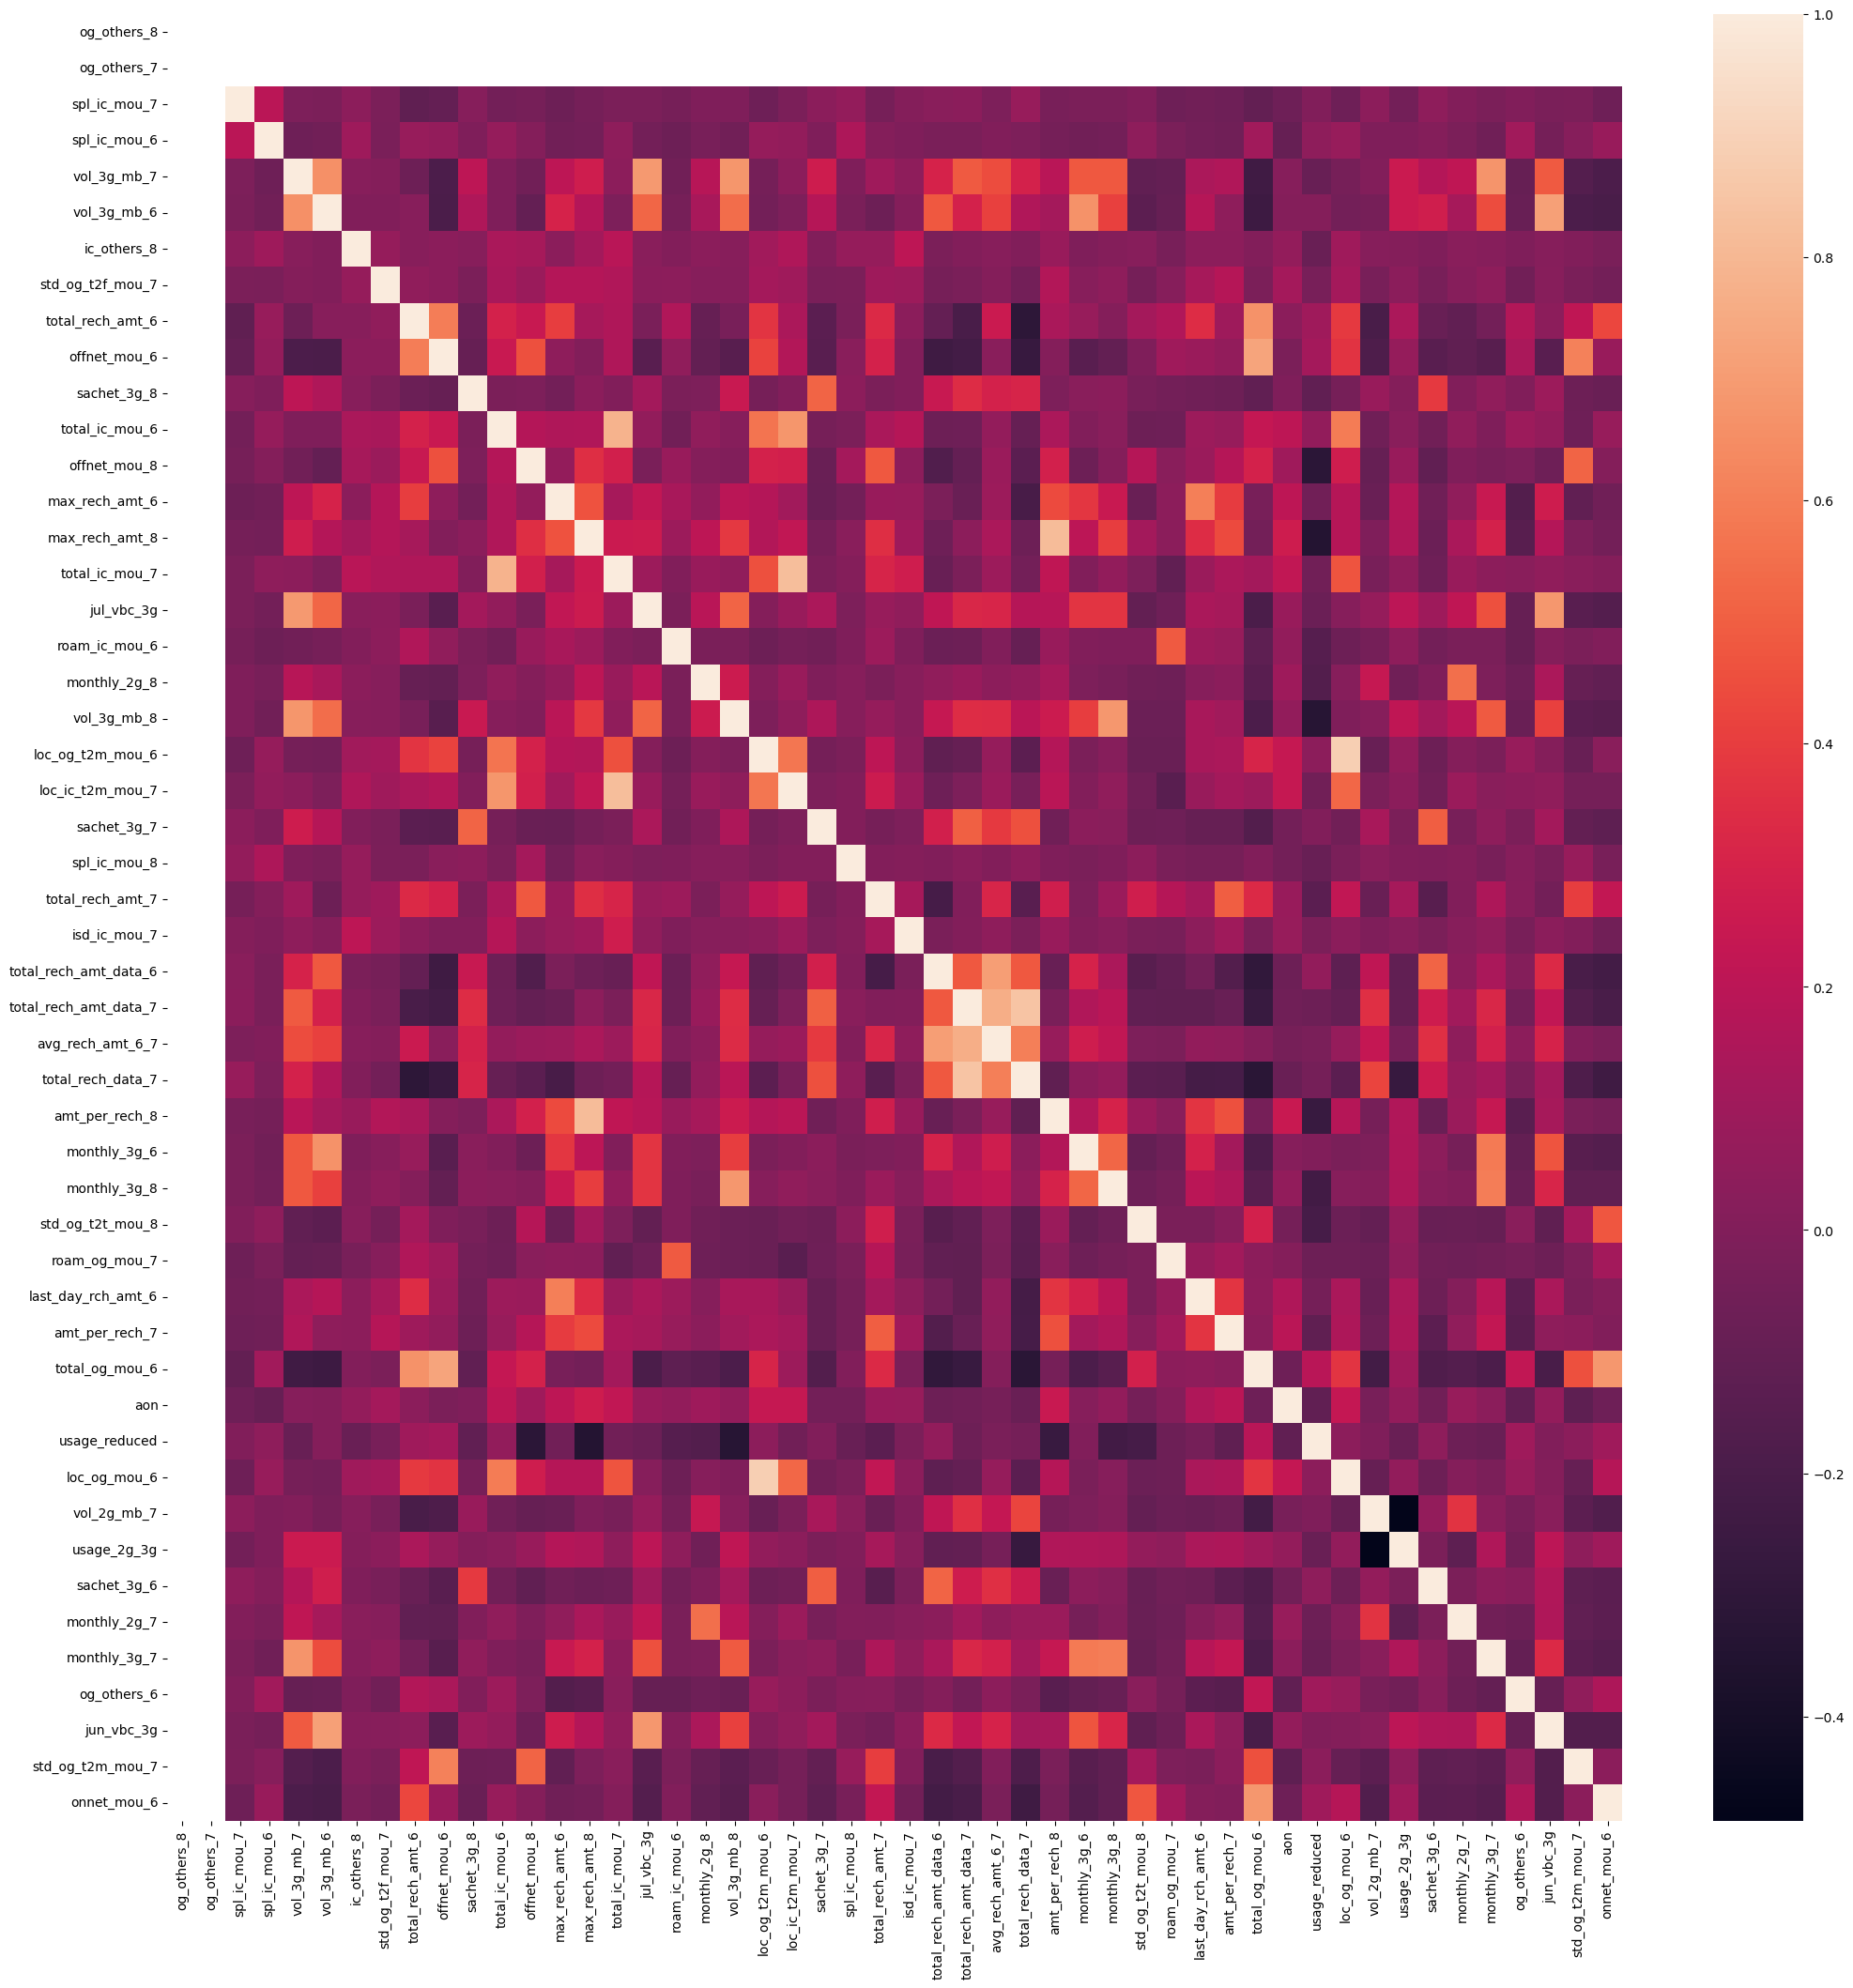

In [169]:
fig,ax =plt.subplots(figsize=(25,25))
sns.heatmap(rfe_imp_feature_heatmap.corr(),ax =ax)

In [170]:
#Feature selection using Random Forest
rnd_clf = RandomForestClassifier(criterion='gini',max_depth=15,
                                              max_features='sqrt',
                                              min_samples_leaf=100,
                                              min_samples_split=50,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True,
                                              random_state=42, verbose=0,
                                              warm_start=False)

In [171]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=100,
                       min_samples_split=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [172]:
rnd_clf.feature_importances_

array([1.99009461e-03, 2.20567496e-03, 5.15303855e-02, 3.45683696e-03,
       1.16585408e-03, 4.73039640e-03, 1.93346986e-03, 1.76073529e-03,
       1.87309968e-02, 2.92686297e-04, 3.20191571e-03, 1.64138626e-02,
       1.03381437e-04, 2.80536569e-03, 2.16418893e-02, 8.02544422e-04,
       6.45714576e-04, 1.35563622e-02, 2.20510150e-03, 8.32898116e-04,
       2.70704497e-02, 5.73538521e-04, 9.36182666e-05, 6.70015651e-03,
       9.75380011e-05, 8.04949512e-05, 6.51602274e-05, 2.84645600e-03,
       1.88565462e-03, 4.90211772e-02, 9.90390812e-04, 1.92047616e-03,
       4.77972470e-04, 6.90698634e-03, 1.90118946e-03, 4.47165113e-03,
       1.30359234e-05, 3.08209062e-05, 2.21146272e-06, 2.45950034e-03,
       2.30372219e-03, 7.23387058e-03, 3.70557372e-05, 1.80918617e-04,
       1.27385830e-04, 3.00243424e-04, 3.11493869e-04, 9.61223471e-04,
       4.26528595e-05, 0.00000000e+00, 0.00000000e+00, 4.45273540e-03,
       3.21462210e-03, 5.25719597e-02, 2.18223625e-03, 1.07409917e-03,
      

In [173]:
len(rnd_clf.feature_importances_)
cum_sum_rf = np.cumsum(rnd_clf.feature_importances_)

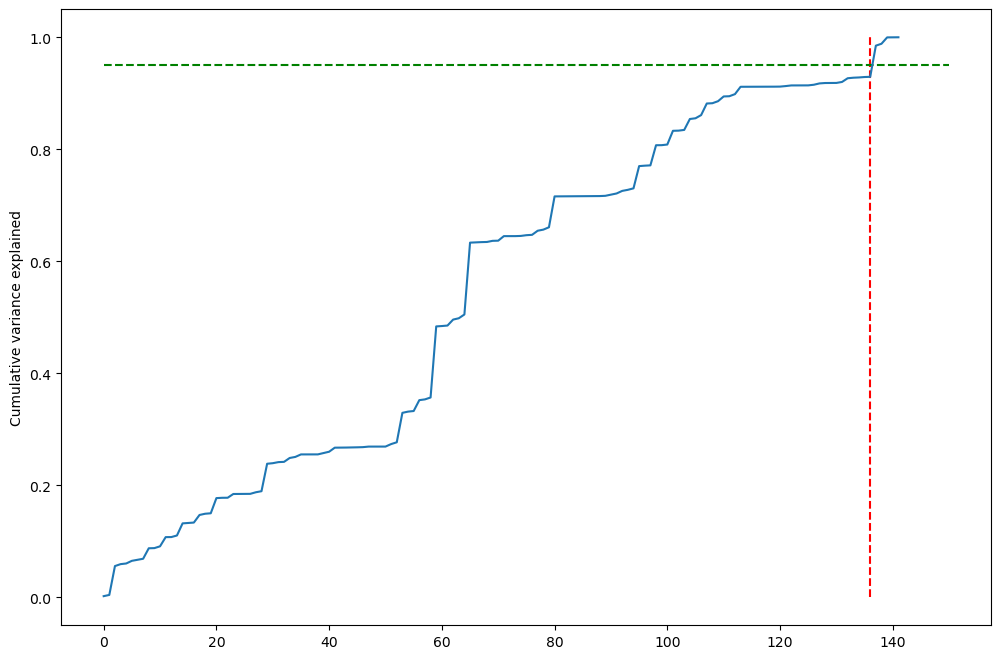

In [174]:

fig = plt.figure(figsize=[12,8])
plt.vlines(x=136, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(cum_sum_rf)
plt.ylabel("Cumulative variance explained")
plt.show()

In [175]:
rnd_imp_feature = pd.DataFrame(rnd_clf.feature_importances_,index=X_train.columns,columns=["value"])

<AxesSubplot:>

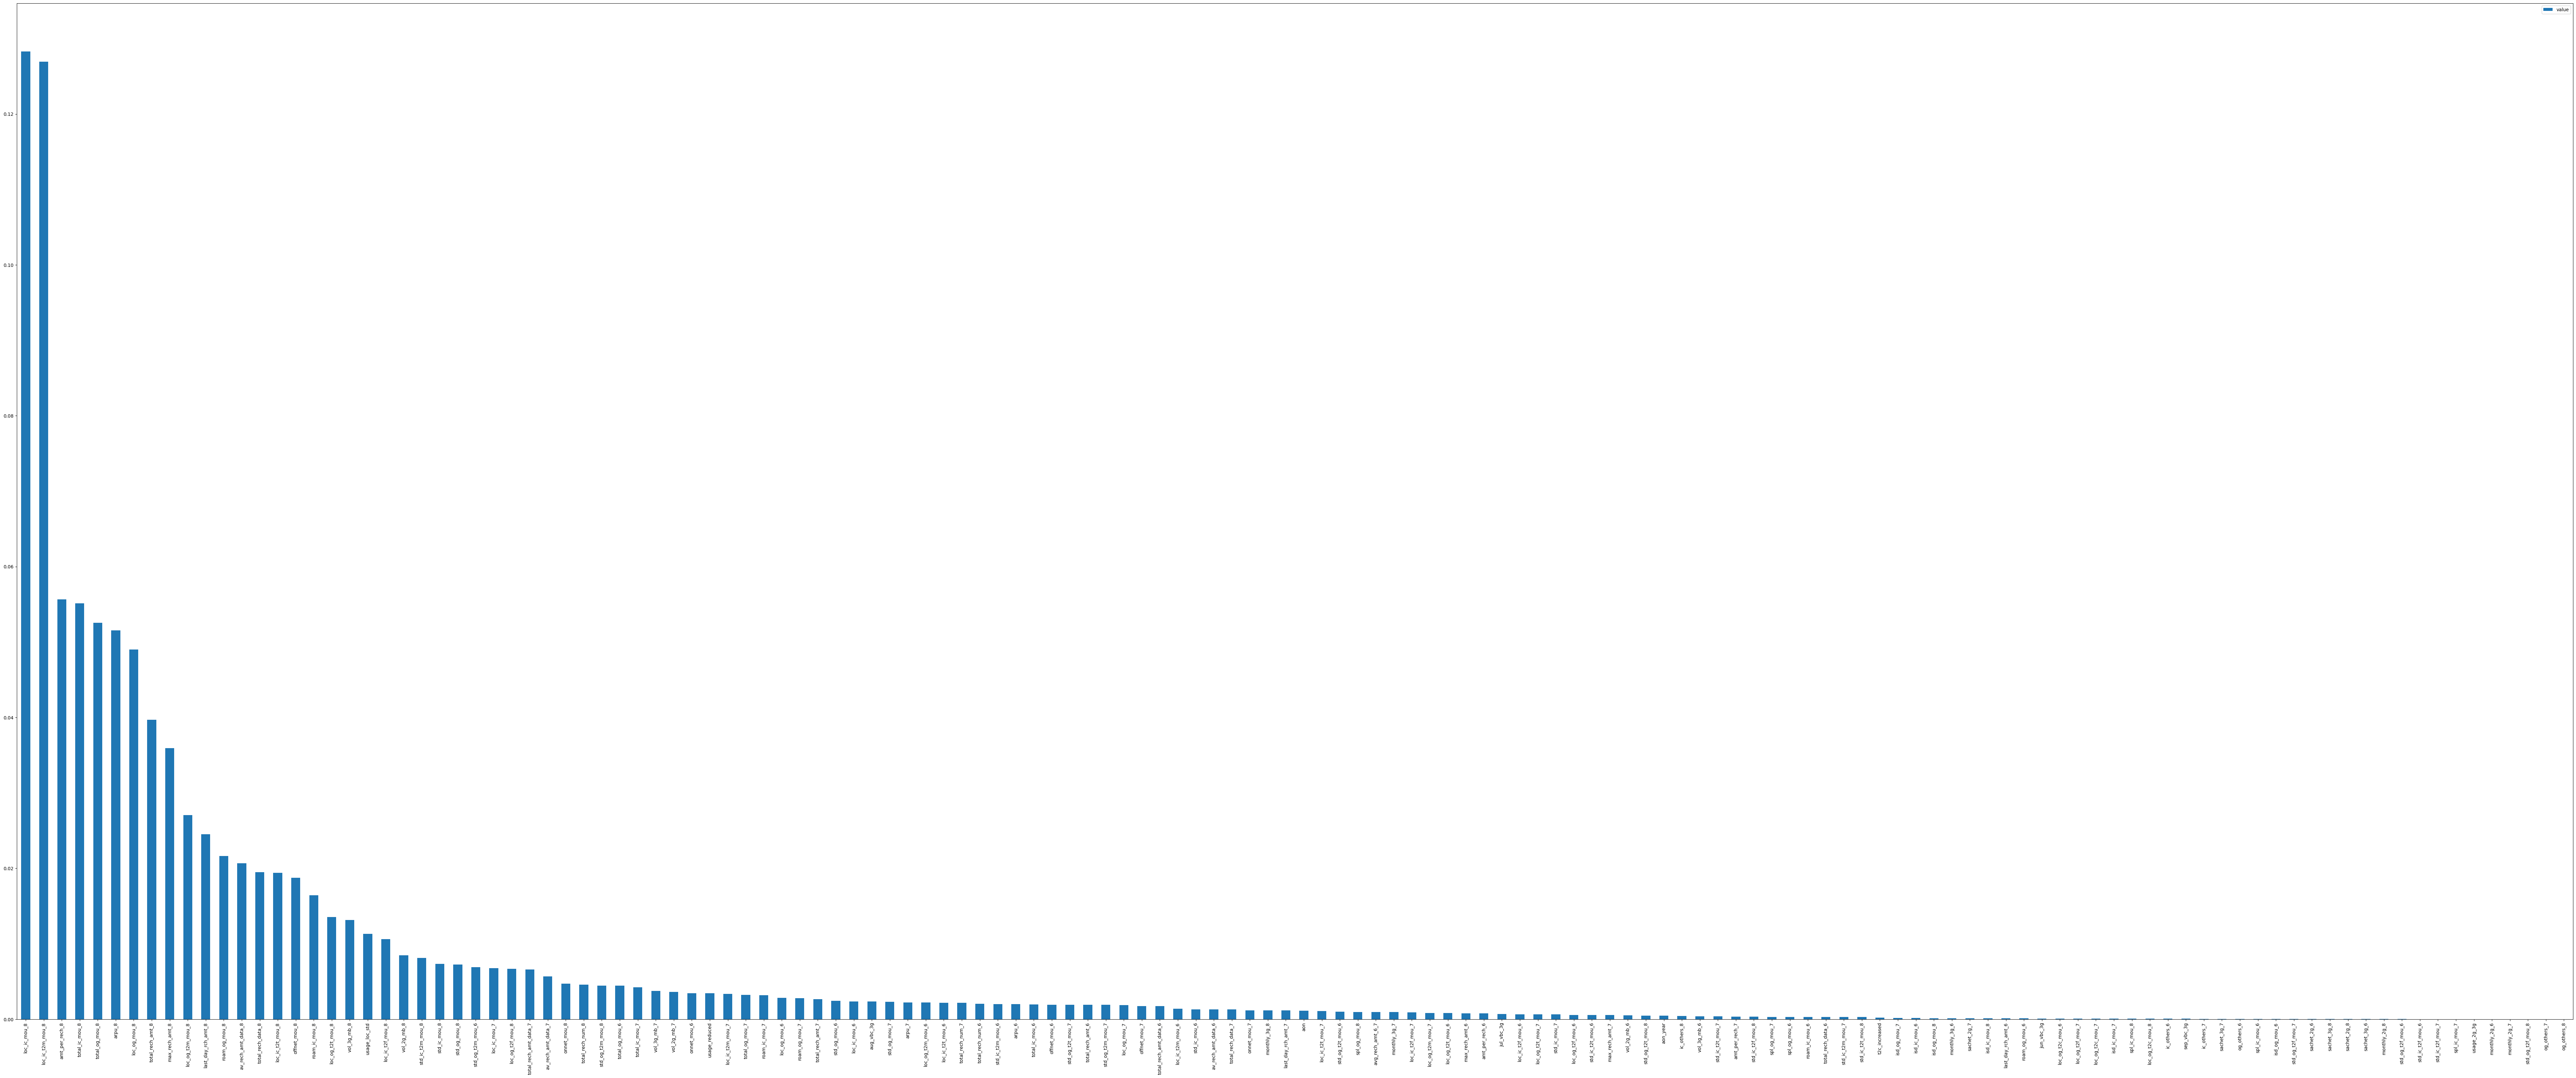

In [176]:
rnd_imp_feature = rnd_imp_feature.sort_values(by='value', ascending=False)
rnd_imp_feature.plot(figsize=(100,40),kind='bar')

###### Top 10 feature using random Forest.


<AxesSubplot:>

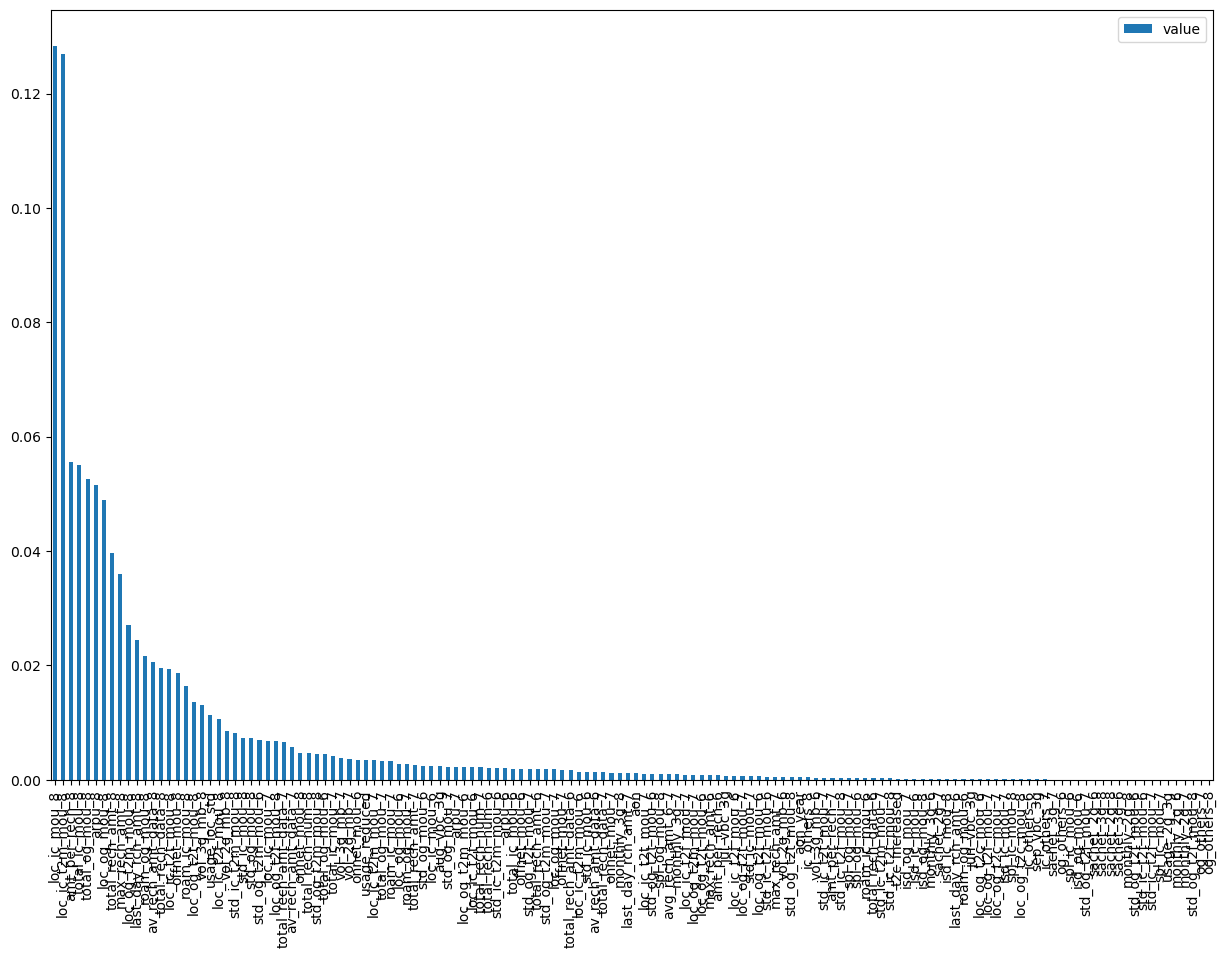

In [177]:
# Showing Features in bar chart
rnd_imp_feature = rnd_imp_feature.sort_values(by='value', ascending=False)
rnd_imp_feature.plot(figsize=(15,10),kind='bar')

#### Feature selection using SelectKBest

In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [179]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_train)

In [180]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_scaled,y_train)

In [181]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [182]:
#Selecting 10 KBest
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs  Score
139       usage_loc_std 581.11
138       usage_reduced 317.54
29         loc_og_mou_8 224.28
20     loc_og_t2m_mou_8 222.21
65         loc_ic_mou_8 217.69
80       total_ic_mou_8 212.27
107  av_rech_amt_data_8 210.70
59     loc_ic_t2m_mou_8 208.73
95     total_rech_amt_8 189.58
116        monthly_2g_8 178.76


<AxesSubplot:ylabel='Specs'>

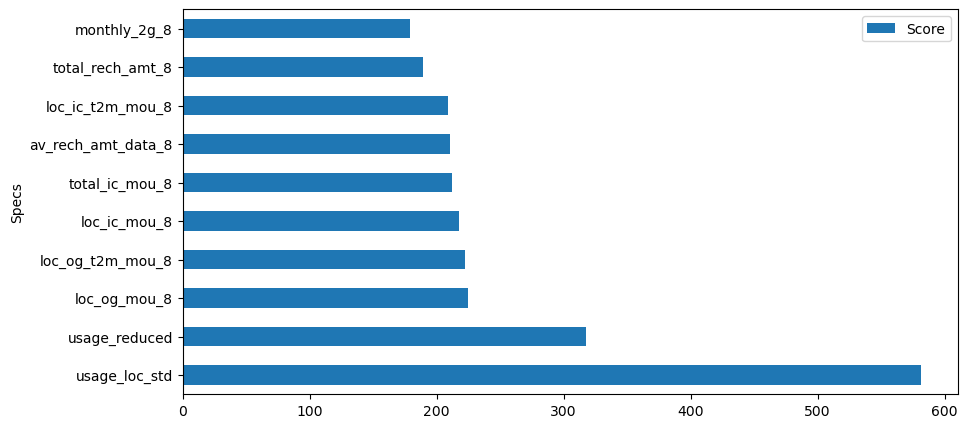

In [183]:
KBest_imp_feature = featureScores.set_index('Specs').sort_values(by='Score', ascending=False).head(10)
KBest_imp_feature.plot(figsize=(10,5),kind='barh')

In [184]:
selectKbest_top_25 = featureScores.nlargest(25,'Score')['Specs']
selectKbest_top_25.values[:]

array(['usage_loc_std', 'usage_reduced', 'loc_og_mou_8',
       'loc_og_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'av_rech_amt_data_8', 'loc_ic_t2m_mou_8', 'total_rech_amt_8',
       'monthly_2g_8', 'total_og_mou_8', 'total_rech_data_8',
       'roam_og_mou_7', 'last_day_rch_amt_8', 'vol_3g_mb_8',
       'loc_og_t2t_mou_8', 'std_og_mou_6', 'loc_ic_t2t_mou_8',
       'aug_vbc_3g', 'max_rech_amt_8', 'offnet_mou_8', 'sachet_2g_8',
       'total_rech_num_8', 'monthly_2g_7', 'vol_2g_mb_8'], dtype=object)

In [185]:
kbest_set = set([x[0:len(x)-2] for x in selectKbest_top_25.values[:]])

In [186]:
rfe_set = set([x[0:len(x)-2] for x in rfe_top_25])


##### Most Important Feature 

common Feature in RFE and KbestSelector. 


In [187]:
imp_feature = kbest_set and rfe_set
imp_feature

{'ic_others',
 'jul_vbc_',
 'loc_ic_t2m_mou',
 'loc_og_t2m_mou',
 'max_rech_amt',
 'monthly_2g',
 'offnet_mou',
 'og_others',
 'roam_ic_mou',
 'sachet_3g',
 'spl_ic_mou',
 'std_og_t2f_mou',
 'total_ic_mou',
 'total_rech_amt',
 'vol_3g_mb'}

## Observations to recommend solutions for customer Churn

Recall is very important than accuracy in the model prepartion . We have tried to use different models and tried to boost the prediction  with multiple algos like RF, Stacking etc.

After applying Stacking on different classifier model output we have achieved the Recall of 86 and 69 for train and test data respectively where as  when we compare these results with indiviual model, We find out that KNN is giving  best recall values of 92 and 89 for train and test data respectively.